In [1]:
31.25/4

7.8125

# Section 5.2

In [3]:
import numpy as np
from tabulate import tabulate
import os
from matplotlib import pyplot as plt

In [2]:
#data import
v_sample = 62.5 / 2
v_sig = np.arange(.1, 1.1, .1) * v_sample
v_read = np.array(
    [3.125, 6.25, 9.346, 12.5, 15.57, 18.86, 21.93, 25, 28.15, 31.25])
signal_error = np.array([0, 0, 0.05, 0.2, 0.03, 0.06, 0, 0, 0.07, 0])
period = np.array([320, 160, 106, 80, 64, 53.6, 45.6, 40, 35.4, 32])
period_error = np.array([0, 0, 1, 0, 0, 0.6, 0, 0, 0, 0])
voltage = np.array(
    [1.21, 1.29, 1.08, 0.0736, 0.09, 0.0436, 1.28, 1.31, 1.38, 1.5])
voltage_error = np.array([0.01, 0.01, 0.01, 0.01, 2, 2, 0, 0, 0.02, 0.01])

In [3]:
data = np.concatenate(
    (v_sig[np.newaxis], v_read[np.newaxis], signal_error[np.newaxis],
     period[np.newaxis], voltage[np.newaxis]))

In [4]:
print(
    tabulate(data.T,
             headers=('nu  (MHz)', 'nu (on oscil) (MHz)', 'Signal Error (MHz)',
                      'Period (ns)', 'Period Error (ns)',
                      'Voltage (peak to peak) (V)'),
             tablefmt='grid'))

+-------------+-----------------------+----------------------+---------------+---------------------+
|   nu  (MHz) |   nu (on oscil) (MHz) |   Signal Error (MHz) |   Period (ns) |   Period Error (ns) |
+=============+=======================+======================+===============+=====================+
|       3.125 |                 3.125 |                 0    |         320   |              1.21   |
+-------------+-----------------------+----------------------+---------------+---------------------+
|       6.25  |                 6.25  |                 0    |         160   |              1.29   |
+-------------+-----------------------+----------------------+---------------+---------------------+
|       9.375 |                 9.346 |                 0.05 |         106   |              1.08   |
+-------------+-----------------------+----------------------+---------------+---------------------+
|      12.5   |                12.5   |                 0.2  |          80   |             

In [5]:
import glob

In [6]:
#Read in the files from the Lab_1_waveforms folder
samples = 300
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_waveforms/'
files = sorted(glob.glob(path + '*'))
data_5v = [np.load(file)['arr_0'][200:500] for file in files]

path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_waveforms_2/'
files = sorted(glob.glob(path + '*'))
data_2v = [np.load(file)['arr_0'][200:500] for file in files]

In [7]:
# normalize to propper voltages
voltage = np.array(
    [1.21, 1.29, 1.08, 0.0736, 0.09, 0.0436, 1.28, 1.31, 1.38, 1.5])
for i, volt in zip(np.arange(0, len(data_2v)), voltage):
    data_2v[i] = data_2v[i] / data_2v[i].max() * (volt / 2)
    data_5v[i] = data_5v[i] / data_5v[i].max() * (volt / 2)

In [8]:
#Set up the times from the sampler
times = np.linspace(0, samples / (v_sample*1e6), samples)

<ipython-input-9-76fb126a2714>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


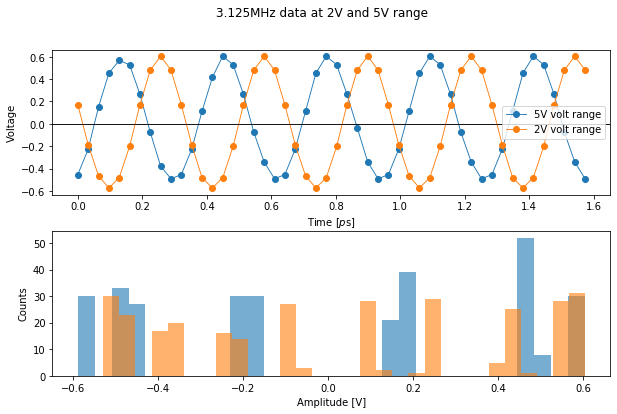

In [9]:
plot = 0
fig, (ax1, ax2) = plt.subplots(nrows=2,
                               gridspec_kw={
                                   'hspace': .25,
                                   'wspace': .45
                               },
                               figsize=(10, 6))
plt.suptitle(str(v_sig[plot])+'MHz data at 2V and 5V range')
ax1.plot(times[0:50]*1e6, data_5v[plot][0:50], 'o-', lw=.9, alpha=1, label='5V volt range')
ax1.set_xlabel('Time [$p$s]')
ax1.axhline(color='k', lw=.7)
ax1.set_ylabel('Voltage')
ax1.plot(times[0:50]*1e6, data_2v[plot][0:50], 'o-', lw=.9, alpha=1, label='2V volt range')
ax1.axhline(color='k', lw=.7)

ax2.hist(data_2v[plot], bins=30, alpha=.6)
ax2.hist(data_5v[plot], bins=30, alpha=.6)
ax2.set_xlabel('Amplitude [V]')
ax2.set_ylabel('Counts')
ax1.legend()
plt.tight_layout()

In [10]:
#Find the period
def avg_period(data, times, nsamples=16000):
    """
    Find the average period of a sampled wave form in ns
    """
    peak = []
    for i in range(nsamples - 1):
        if data[i - 1] < data[i] and data[i + 1] < data[i]:
            peak.append(times[i])
    T = []
    for i in range(len(peak) - 1):
        T.append(peak[i + 1] - peak[i])
    return np.asarray(np.mean(T)) * 1e9


periods_2v = np.array(
    [avg_period(dat, times, nsamples=samples) for dat in data_2v])
periods_5v = np.array(
    [avg_period(dat, times, nsamples=samples) for dat in data_5v])

## Does the period match what you expected?

In [11]:
periods = np.concatenate(
    (periods_2v[np.newaxis], periods_5v[np.newaxis], period[np.newaxis]))
print(
    tabulate(periods.T,
             headers=('2V volt range periods [ns]', '5V volt range periods[ns]',
                      'Scope Periods[ns]'),
             tablefmt='grid'))

+------------------------------+-----------------------------+---------------------+
|   2V volt range periods [ns] |   5V volt range periods[ns] |   Scope Periods[ns] |
+==============================+=============================+=====================+
|                     321.07   |                    321.07   |               320   |
+------------------------------+-----------------------------+---------------------+
|                     160.535  |                    160.535  |               160   |
+------------------------------+-----------------------------+---------------------+
|                     107.144  |                    106.783  |               106   |
+------------------------------+-----------------------------+---------------------+
|                      80.4025 |                     80.2676 |                80   |
+------------------------------+-----------------------------+---------------------+
|                      64.214  |                     64.214  |   

([<matplotlib.axis.XTick at 0x11dcfdbe0>,
 <a list of 10 Text xticklabel objects>)

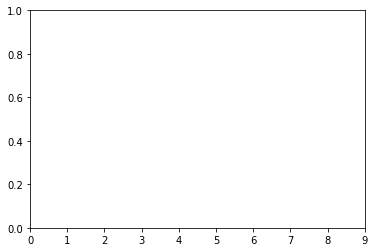

In [12]:
plt.xticks(np.arange(0,10))


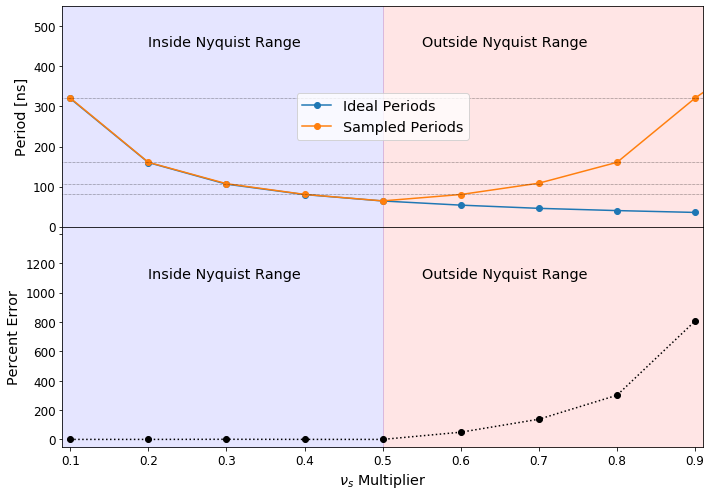

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows= 2, sharex=True, gridspec_kw={'hspace':.00}, figsize=(10,7))
ax1.plot( period[:9], 'o-', label='Ideal Periods')
ax1.plot( periods_2v, 'o-', label='Sampled Periods')
ax1.fill_between(np.arange(4,10.1), 0,550, alpha=.1, color='r')
ax1.fill_between(np.arange(-.1,4.05,.05), 0,550, alpha=.1, color='b')
ax1.annotate('Inside Nyquist Range', (1,450), fontsize='x-large')
ax1.annotate('Outside Nyquist Range', (4.5,450), fontsize='x-large')

xmins=[0.01,.15, .25, .37]
xmaxs=[1,.87,.75, .62]
for i, xm, xma in zip(range(4), xmins, xmaxs):
    ax1.axhline(periods_2v[i],xmin=0, xmax=1, ls=':', c='k', lw=.5)
ax1.set_xlim(-.1,8.1)
ax1.set_ylim(0,550)
ax1.set_xticks(np.arange(0,10), [])

ax1.legend(loc='center', fontsize='x-large')


ax2.plot( 100*np.abs(period[:9]-periods_2v[:9])/period[:9], 'o:k', label='Error')
ax2.fill_between(np.arange(4,10.1), -50,1450, alpha=.1, color='r')
ax2.fill_between(np.arange(-.1,4.05,.05), -50,1450, alpha=.1, color='b')

ax2.annotate('Inside Nyquist Range', (1,1100), fontsize='x-large')
ax2.annotate('Outside Nyquist Range', (4.5,1100), fontsize='x-large')
ax2.set_xlim(-.1,9.1)
ax2.set_ylim(-50,1450)
plt.xticks(np.arange(0,10), [round(i*.1,2) for i in range(1,10)])

ax2.set_xlabel(r'$\nu_s$ Multiplier', fontsize='x-large')
ax1.set_ylabel('Period [ns]', fontsize='x-large')
ax2.set_ylabel('Percent Error', fontsize='x-large')

plt.setp(ax2.get_yticklabels()[-2], visible=False)    
plt.setp(ax1, xlim=(-.1,8.1))
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig('Period.pdf')

In [14]:
v_sample

31.25

In [15]:
plt.figure()
for p in power_2v:
    plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(p/p.max()))
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(power_2v[0]/power_2v[0].max()), 'k')
plt.axvline(v_sample*1e6/2)


NameError: name 'power_2v' is not defined

<Figure size 432x288 with 0 Axes>

In [16]:
# power spectrum
E_2v = [np.fft.fft(dat) for dat in data_2v]
power_2v = [np.abs(e)**2 for e in E_2v]
E_5v = [np.fft.fft(dat) for dat in data_5v]
power_5v = [np.abs(e)**2 for e in E_5v]
times = np.linspace(0, samples / (v_sample*1e6), samples)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

In [17]:
%matplotlib notebook

## what is the minimum sampling rate that accurately reproduces the spectral frequency in the sampled data?

In [18]:
data = np.load('/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/7_8125/7_8125.npz')['arr_0'][200:500]

In [19]:
power_7 = np.abs(np.fft.fft(data))**2

<IPython.core.display.Javascript object>


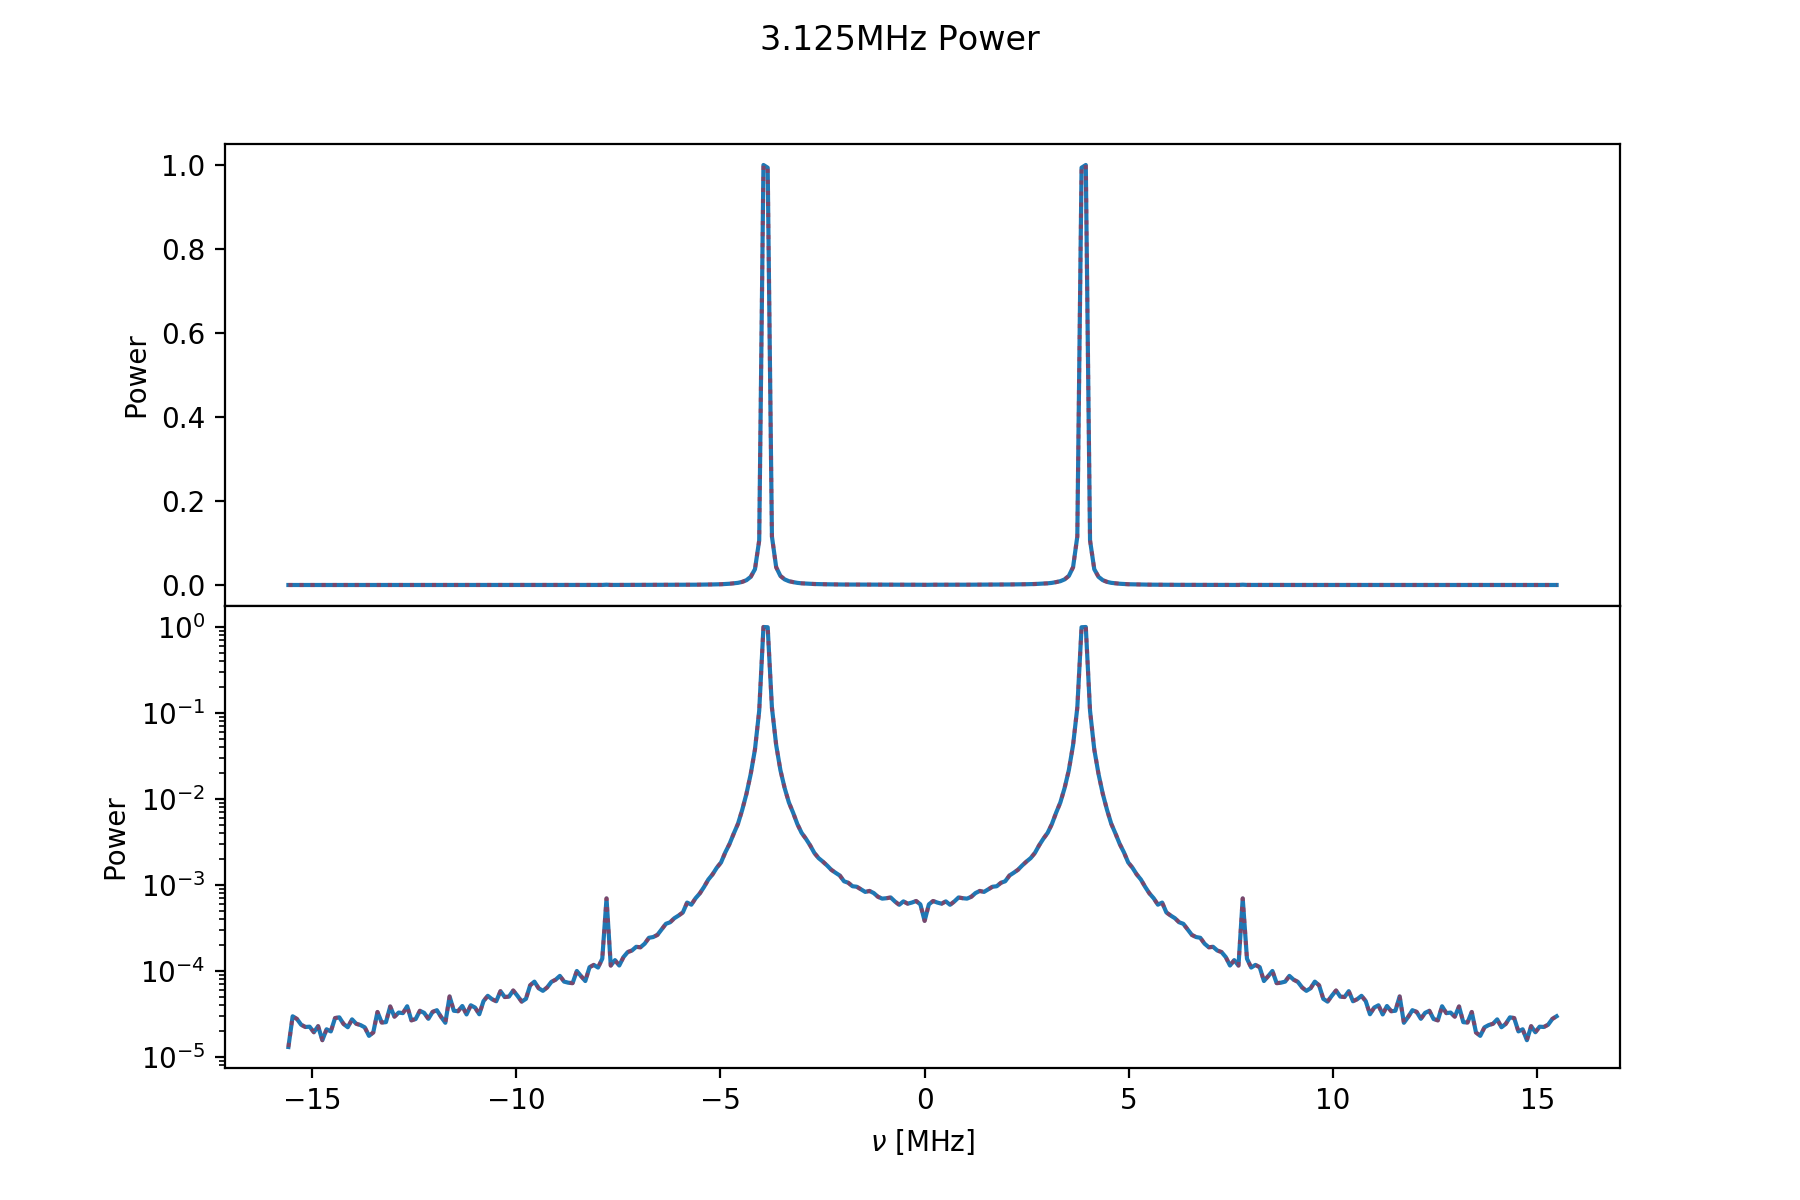

Text(0, 0.5, 'Power')

In [20]:
plot = 0
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0}, figsize=(9,6))
plt.suptitle(str(v_sig[plot]) + 'MHz Power')
ax1.plot(
    np.fft.fftshift(freqs) / 1e6,
    np.fft.fftshift(power_7 / power_7.max()))
ax1.plot(np.fft.fftshift(freqs)/1e6, np.fft.fftshift(power_7/power_7.max()), ':r', alpha=.4)
ax1.set_xlabel(r'$\nu$' + ' [MHz]')
ax1.set_ylabel('Power')
ax2.semilogy(
    np.fft.fftshift(freqs) / 1e6,
    np.fft.fftshift(power_7 / power_7.max()))
ax2.semilogy(np.fft.fftshift(freqs)/1e6, np.fft.fftshift(power_7/power_7.max()), ':r', alpha=.4)
ax2.set_xlabel(r'$\nu$' + ' [MHz]')
ax2.set_ylabel('Power')


Reproduced untill $V_0>.5V_s$

# 5.3 Voltage Spectra and Power Spectra

* What does it mean, that the voltage spectra are complex? 
* What do the real and imaginary parts represent? 
* Is the imaginary part less 'real' than the real part?
* What does it mean, for frequencies to be negative versus positive?
* When you compare the plots for several independent data captures of the same sine wave, do the voltage spectra repeat identically? Why not? 
* What is happening when sometimes the real portions are positive or negative? 
* When the imaginary portions have more amplitude than the real ones?

<IPython.core.display.Javascript object>


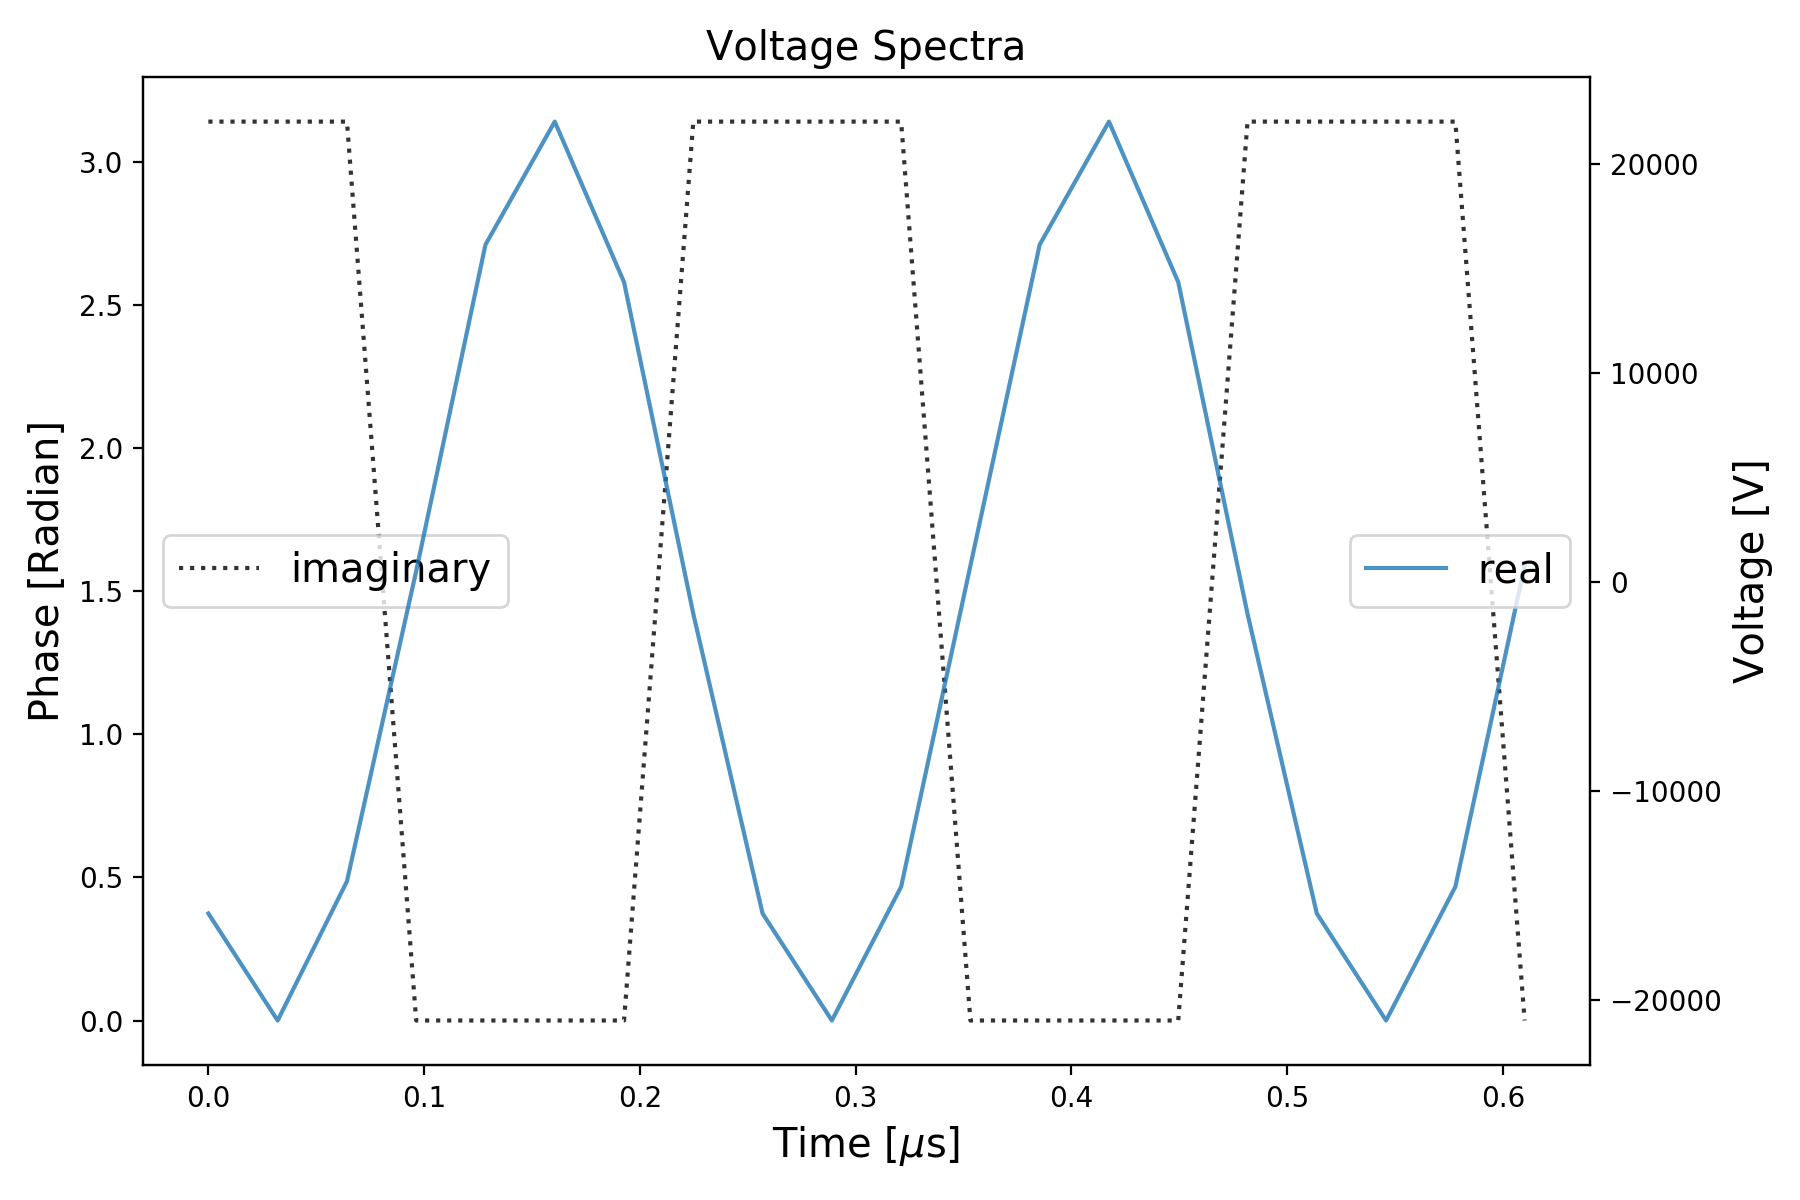

In [21]:
#Plot the real and imaginary portions
plt.figure(figsize=(9,6))
plt.title('Voltage Spectra', fontsize='x-large')
# plt.plot(np.fft.fftshift(freqs), np.real(np.fft.fftshift(np.abs(np.fft.fft(data[0])))), '--k', lw=.8)
plt.plot(times[:20]*1e6, np.angle(data[:20]), ':k', label='imaginary', alpha=.8)
plt.legend(loc = 'center left', fontsize='x-large')
plt.ylabel('Phase [Radian]', fontsize='x-large')
plt.xlabel(r'Time [$\mu$s]', fontsize='x-large')
plt.twinx()
plt.plot(times[:20]*1e6,np.real(data[:20]), label='real', alpha=.8)
plt.ylabel('Voltage [V]', fontsize='x-large')
plt.legend(loc = 'center right', fontsize='x-large')
plt.tight_layout()
plt.savefig('Voltage_spectrum.pdf')

<IPython.core.display.Javascript object>


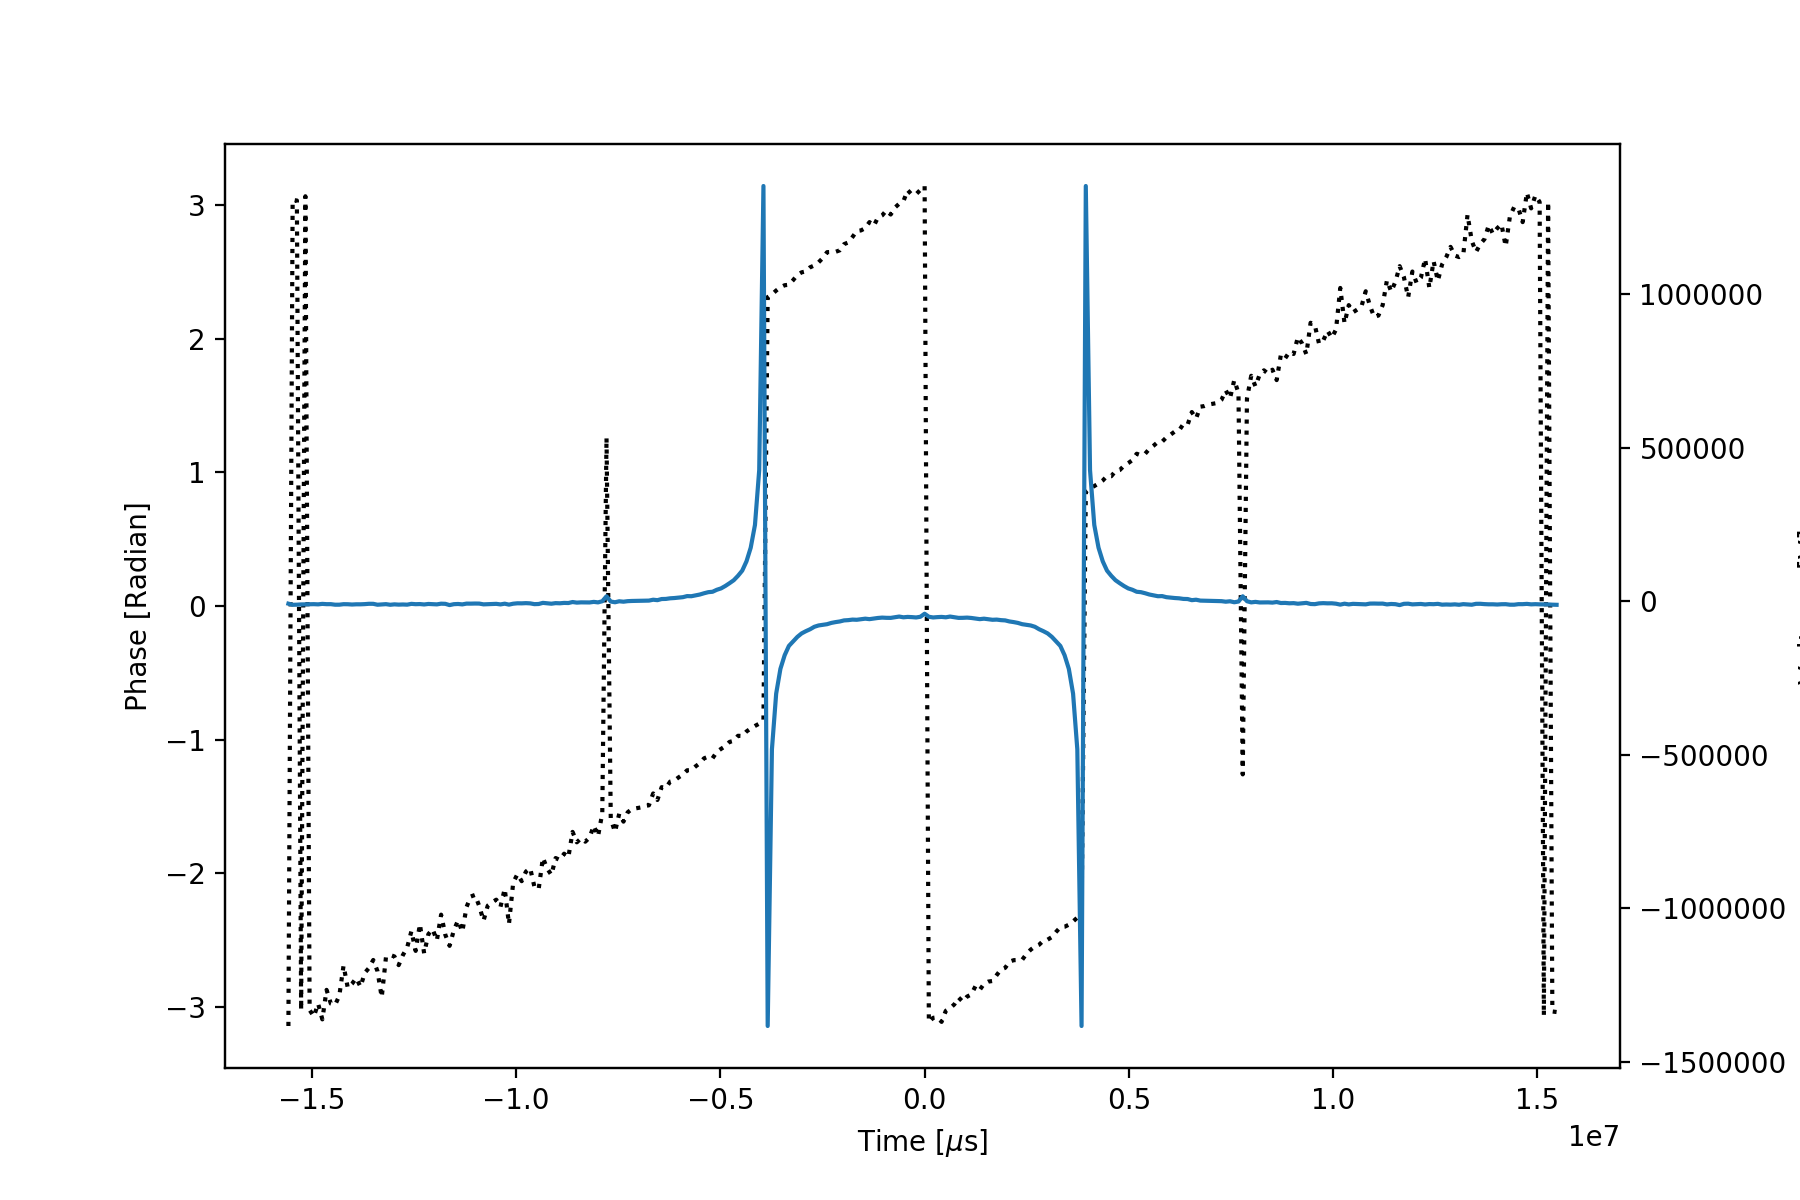

Text(0, 0.5, 'Voltage [V]')

In [22]:
#Plot the real and imaginary portions
plt.figure(figsize=(9,6))
# plt.plot(np.fft.fftshift(freqs), np.real(np.fft.fftshift(np.abs(np.fft.fft(data[0])))), '--k', lw=.8)
plt.plot( np.fft.fftshift(freqs), np.angle(np.fft.fftshift(np.fft.fft(data))), ':k', label='imaginary')
plt.ylabel('Phase [Radian]')
plt.xlabel(r'Time [$\mu$s]')
plt.twinx()
plt.plot(np.fft.fftshift(freqs), np.real(np.fft.fftshift(np.fft.fft(data))), label='real')
plt.ylabel('Voltage [V]')

* What kind of symmetry do the power spectral points exhibit? 
* Why might we use power spectra instead of voltage spectra, and vice versa?

<IPython.core.display.Javascript object>


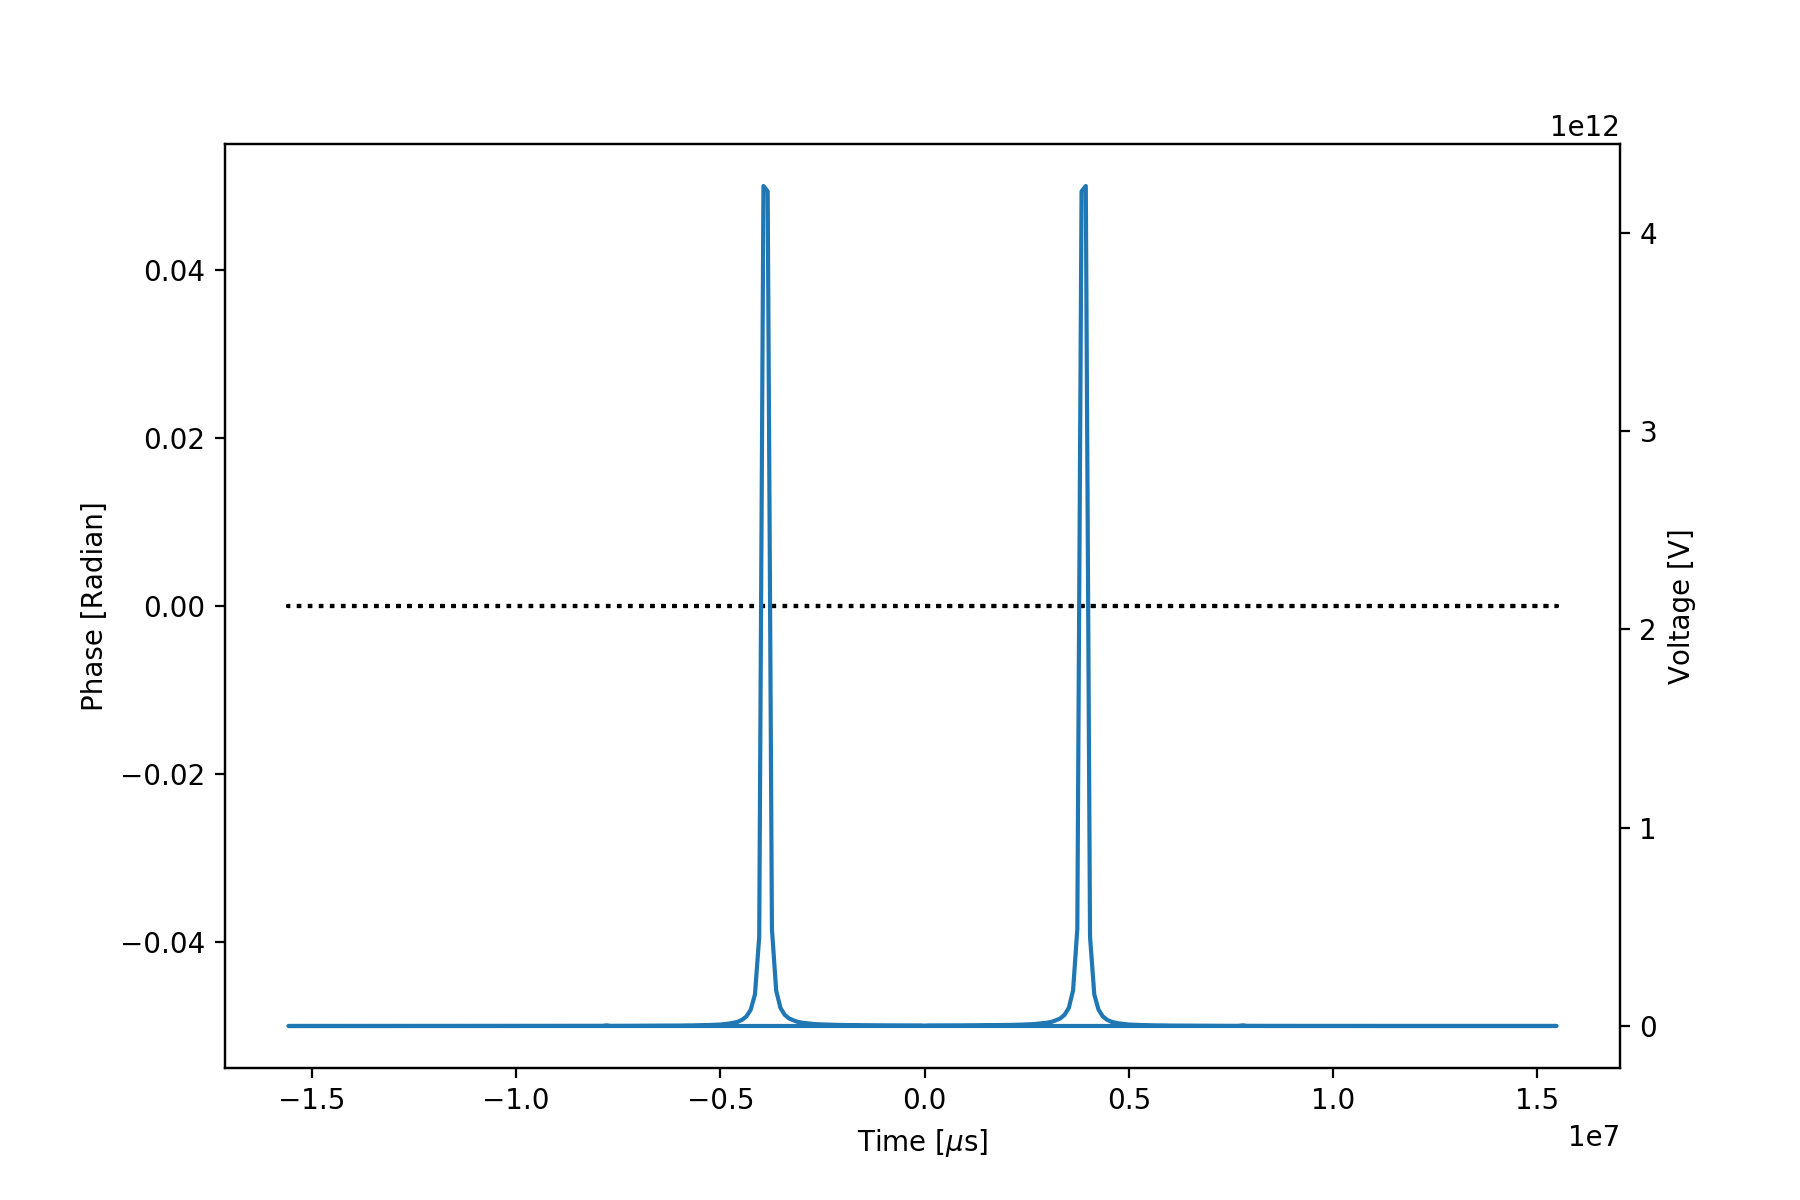

Text(0, 0.5, 'Voltage [V]')

In [23]:

plt.figure(figsize=(9,6))
# plt.plot(np.fft.fftshift(freqs), np.real(np.fft.fftshift(np.abs(np.fft.fft(data[0])))), '--k', lw=.8)
plt.plot(freqs, np.angle(power_7), ':k', label='imaginary')
plt.ylabel('Phase [Radian]')
plt.xlabel(r'Time [$\mu$s]')
plt.twinx()
plt.plot(freqs,np.real(power_7), label='real')
plt.ylabel('Voltage [V]')



In [24]:
from scipy import correlate

In [25]:
# Auto correlation
ftpower = [np.fft.ifft(np.abs(np.fft.fft(dat))**2) for dat in data_2v]
ac = [np.fft.ifft(np.fft.fft(dat) * np.conj(np.fft.fft(dat))) for dat in data_2v]
nac = [np.correlate(dat, dat, mode='same') for dat in data_2v]
sac = [correlate(dat, dat, mode='same') for dat in data_2v]

<ipython-input-25-f19a4c9c4595>:5: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  sac = [correlate(dat, dat, mode='same') for dat in data_2v]


<IPython.core.display.Javascript object>


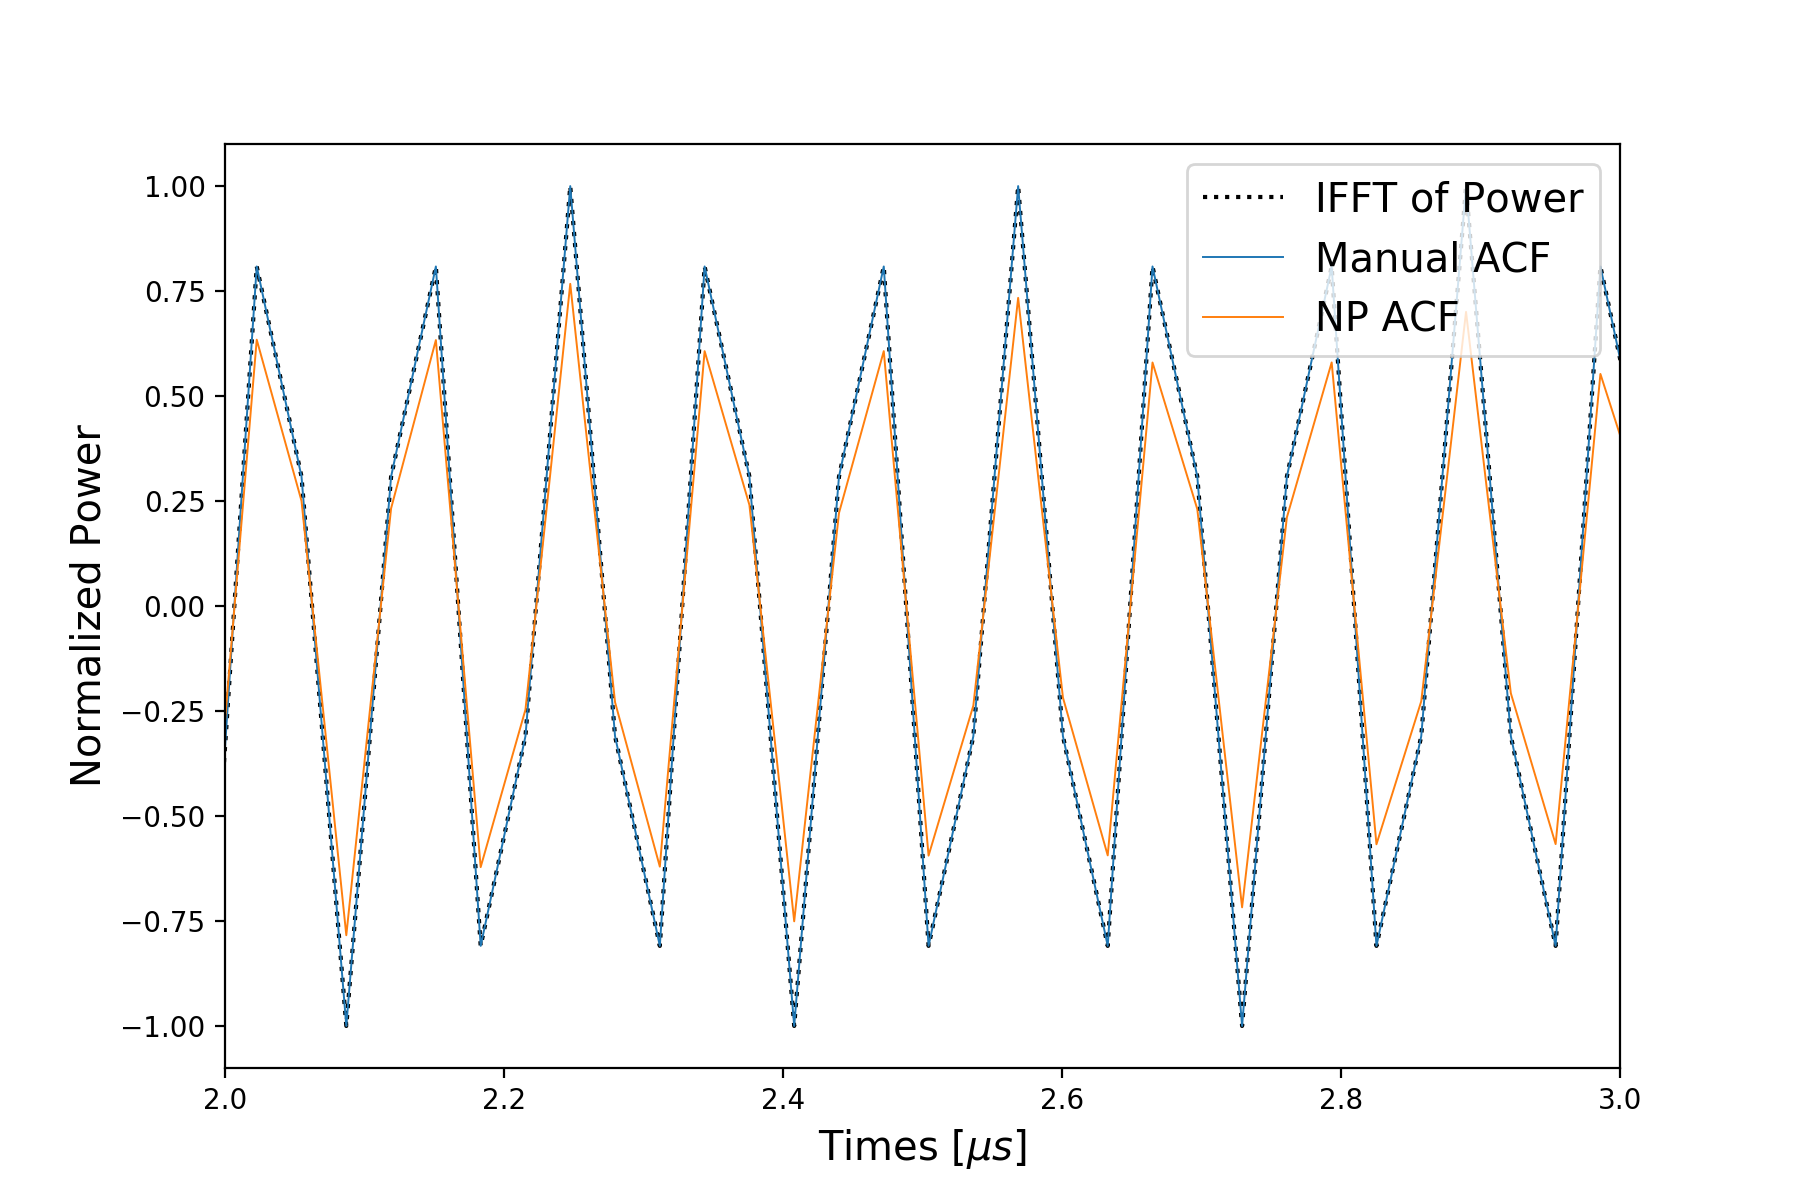

/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [26]:
box = 6
plt.figure(figsize=(9,6))
plt.plot(times*1e6, ftpower[box]/ftpower[box].max(),':k', label='IFFT of Power')
plt.plot(times*1e6, np.fft.fftshift(ac[box] / ac[box].max()), '-', label='Manual ACF', lw=.7)
plt.plot(times*1e6, np.fft.fftshift(nac[box] / nac[box].max()), label='NP ACF', lw=.7)
plt.xlabel(r'Times [$\mu s$]', fontsize='x-large')
plt.ylabel('Normalized Power', fontsize='x-large')
plt.xlim(2,3)
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

<IPython.core.display.Javascript object>


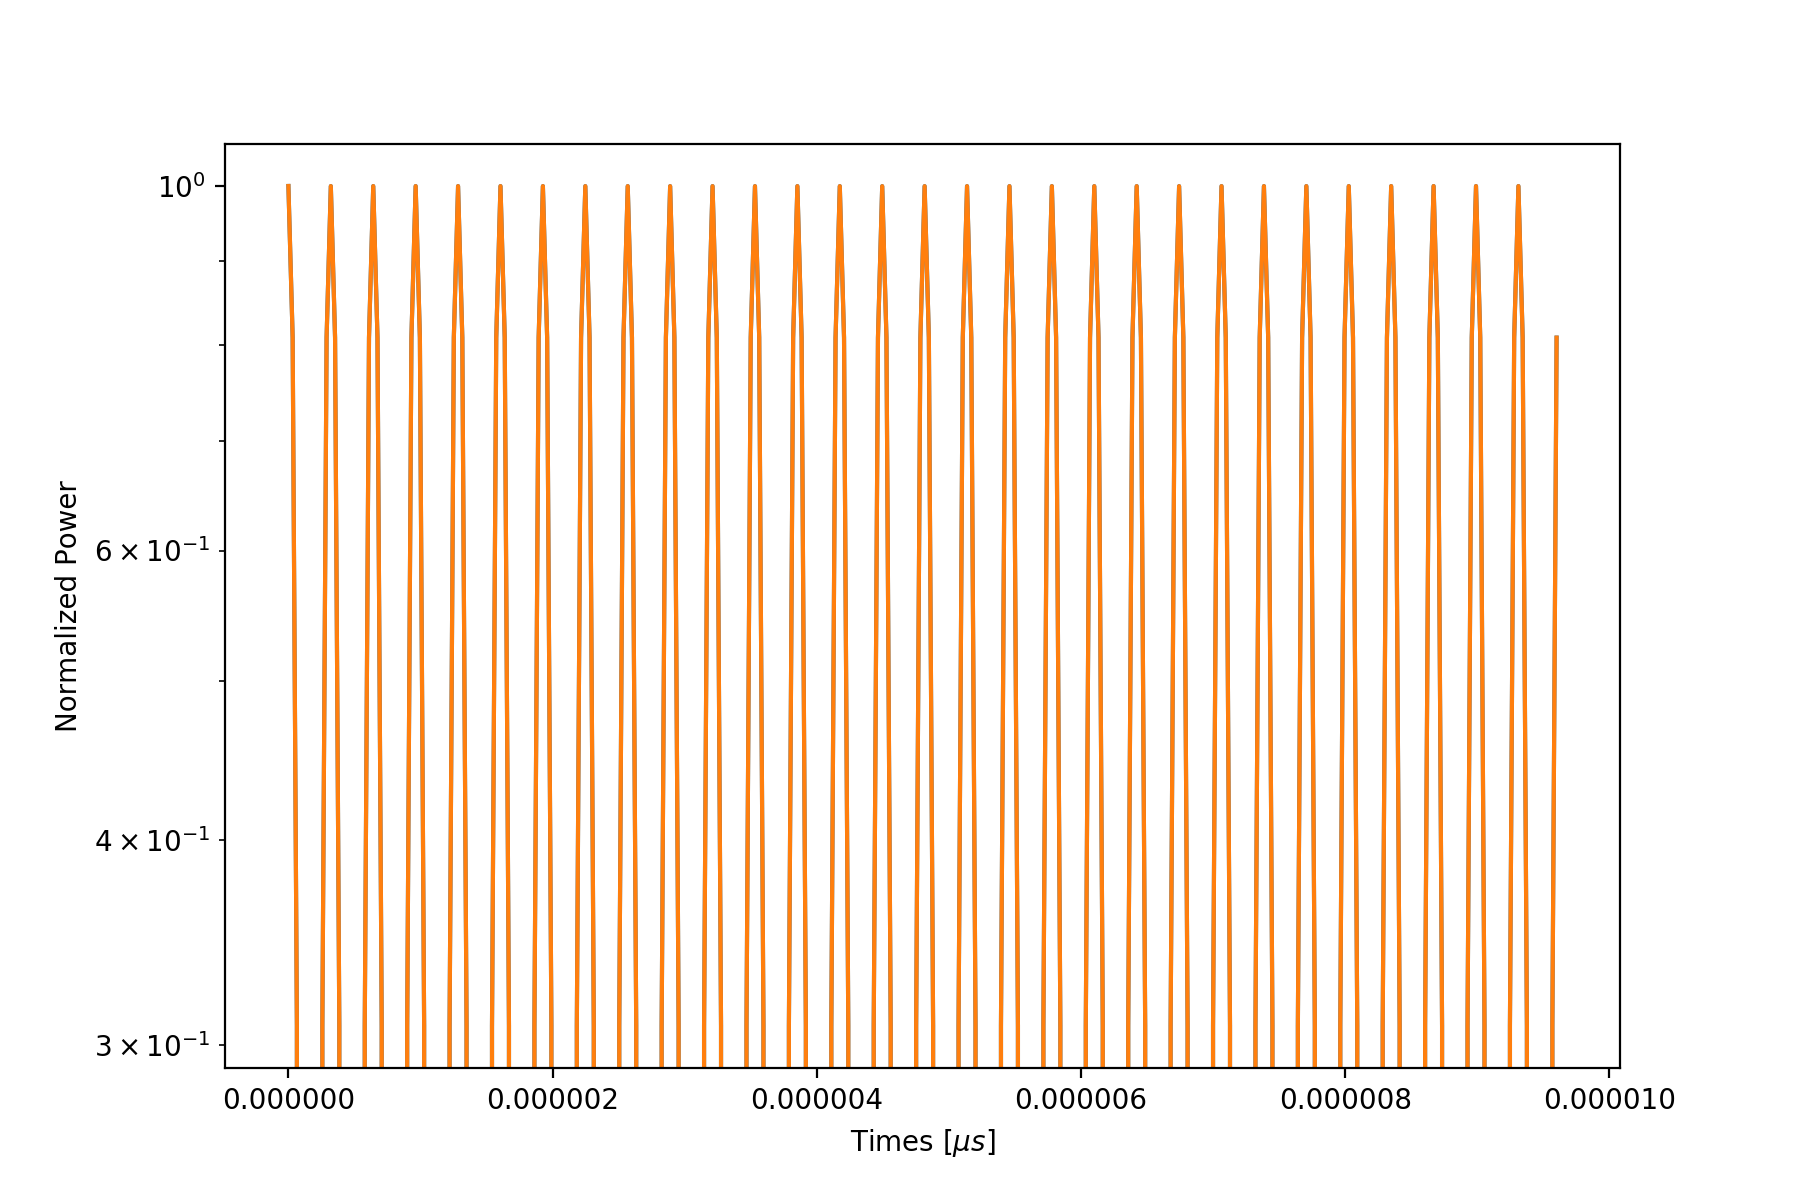

In [27]:
box = 0
plt.figure(figsize=(9,6))
plt.plot(times, ftpower[box]/ftpower[box].max())
plt.semilogy(times, ac[box] / ac[box].max())
# plt.semilogy(times, nac[box] / nac[box].max())
# plt.semilogy(times, sac[box] / sac[box].max(), ':k')
plt.xlabel('Times [$\mu s$]')
plt.ylabel('Normalized Power')
plt.show()

* According to the correlation theorem, the Fourier transform of the power spectrum should equal the ACF. Does it?

# 5.4 Leakage Power

* Can you explain mathematically why you might nd power at  6= 0 using a Discrete Fourier Transform?

In [28]:
data = np.load('/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/7_8125/7_8125.npz')['arr_0'][200:16000]

In [29]:
N = 300
v_sample = 31.25e6
times = np.linspace(-N / v_sample, (N / v_sample - 1) / 2, N)
leakage_freqs = [np.linspace(-v_sample / 2, v_sample / 2 * (1 - 2 / (i*N)),i*N) for i in range(1,8)]



In [30]:
import dft

In [31]:
# leakage_power = np.abs(dft.dft(data, t=times, f=leakage_freqs[6], vsamp=v_sample)[1])**2 

In [32]:
times = np.linspace(0, N  / (v_sample), N )
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

In [33]:
from scipy.signal import get_window as gw

In [34]:
len(data)

15800

In [35]:
leakage_boxcar = np.abs(np.fft.fft(data))**2
leakage_bh = np.abs(np.fft.fft(data*gw('blackmanharris', len(data))))**2
leakage_hann = np.abs(np.fft.fft(data*gw('hann', len(data))))**2
leakage_triangle = np.abs(np.fft.fft(data*gw('triangle', len(data))))**2

<IPython.core.display.Javascript object>


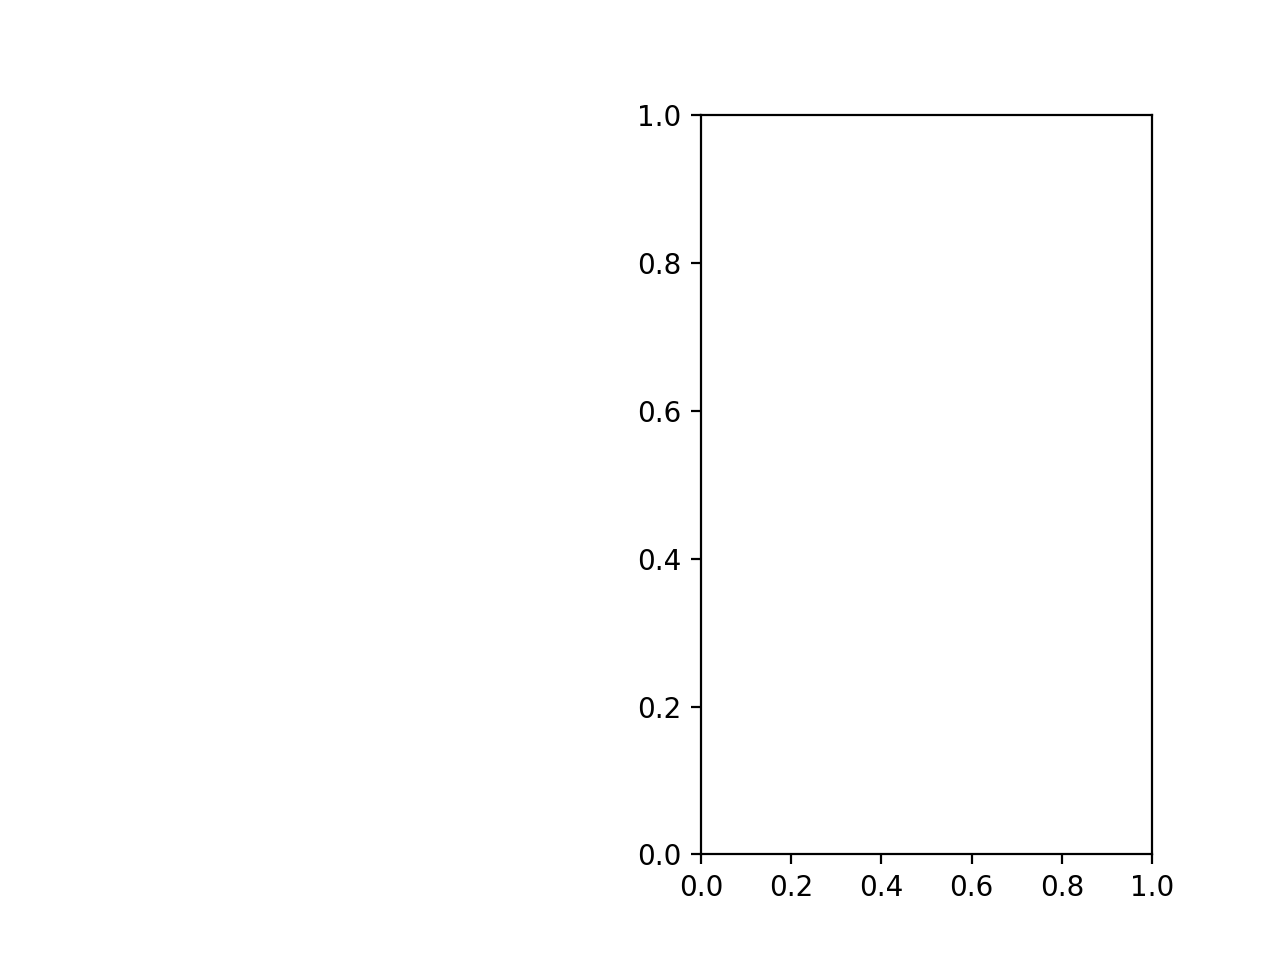

ValueError: x and y must have same first dimension, but have shapes (300,) and (15800,)

In [36]:
plt.figure()
plt.subplot(122)
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(np.fft.fft(gw('hann', len(data)))))
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(np.fft.fft(gw('triangle', len(data)))))


# plt.xlim(-.02,.02)
plt.subplot(121)
plt.plot(times*1e6, gw('hann', len(data)))
plt.plot(times*1e6, gw('triangle', len(data)))



<IPython.core.display.Javascript object>


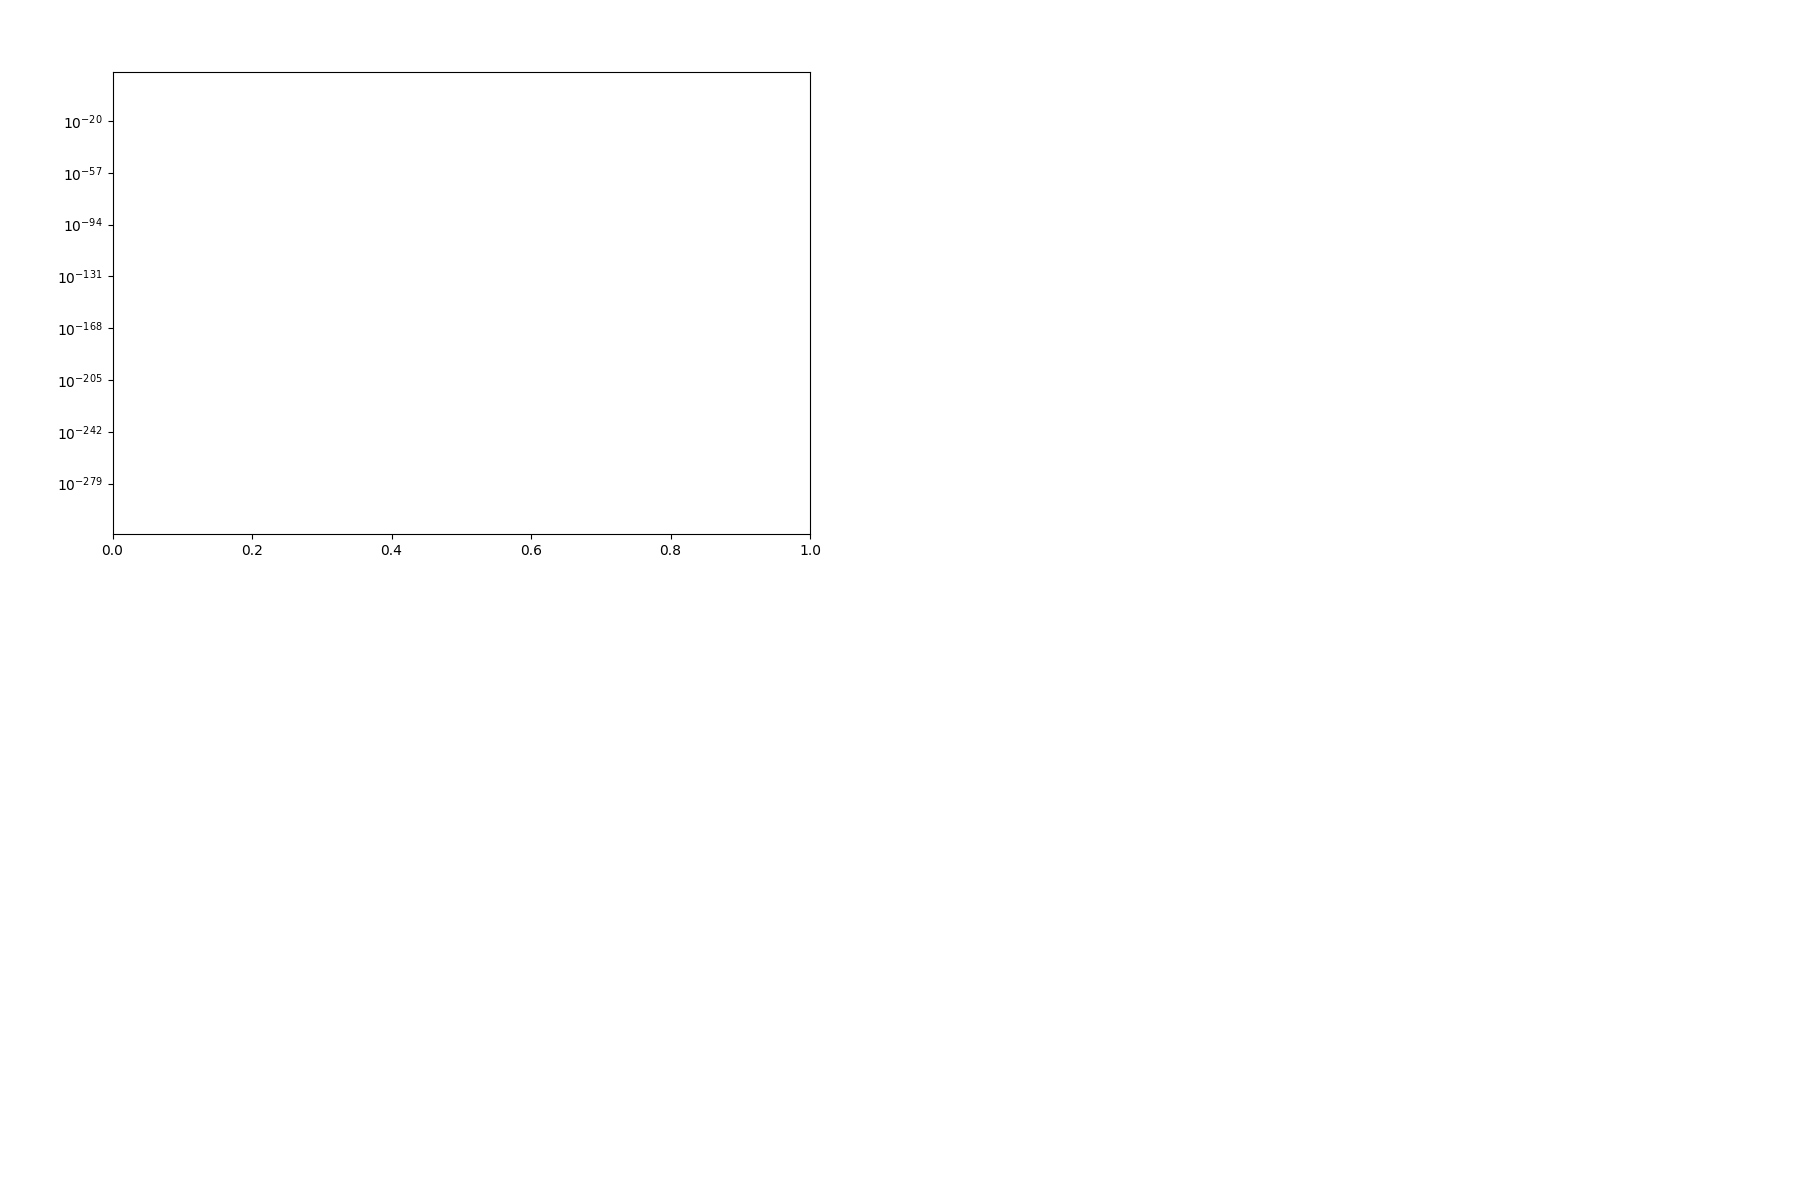

ValueError: x and y must have same first dimension, but have shapes (300,) and (15800,)

In [37]:
plt.figure(figsize=(9,6))
# for i in range(7):
# plt.plot(leakage_freqs[6]/1e6, leakage_power, label='$N_{freq}$= '+str((i+1))+'N samples', alpha=1)
plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(leakage_boxcar/leakage_boxcar.max()), '--k', label='Original Data')
plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(leakage_hann/leakage_hann.max()), label = 'Hanning Window')
plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(leakage_triangle/leakage_triangle.max()), label='Triangle Window')
# plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(leakage_nuttall))
plt.tick_params(axis='both', which='major', labelsize=12)



plt.legend(fontsize='large')
plt.xlabel(r'$\nu$ [MHz]', fontsize='x-large')
plt.ylabel('Power [$V^2$]', fontsize='x-large')
# plt.xlim(.526, .726)
# plt.ylim(0,1.2e12)
plt.tight_layout()
plt.savefig('freq_leak.pdf')

# Frequency Resolution

* How close together can the two frequencies be for you to still distinguish them? 
* This is called the frequency resolution. How does it depend on the number of samples used in the DFT? 
* In particular, how does it compare to time interval that those samples span?
* Can you explain your findings mathematically?

In [38]:
v_sample=31.25e6
samples=16000
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_freq_res/'
fr_files = [file for file in sorted(glob.glob(path + '*'))]
fr_data = [np.load(file)['arr_0'] for file in fr_files]
widths = [
    r'$\Delta\nu$=.003MHz', r'$\Delta\nu$=.005MHz', r'$\Delta\nu$=.05MHz',
]

In [39]:
fr_power = [np.abs(np.fft.fft(dat))**2 for dat in fr_data[:3]]
times = np.linspace(0, samples / (v_sample/1e6), samples)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

<IPython.core.display.Javascript object>


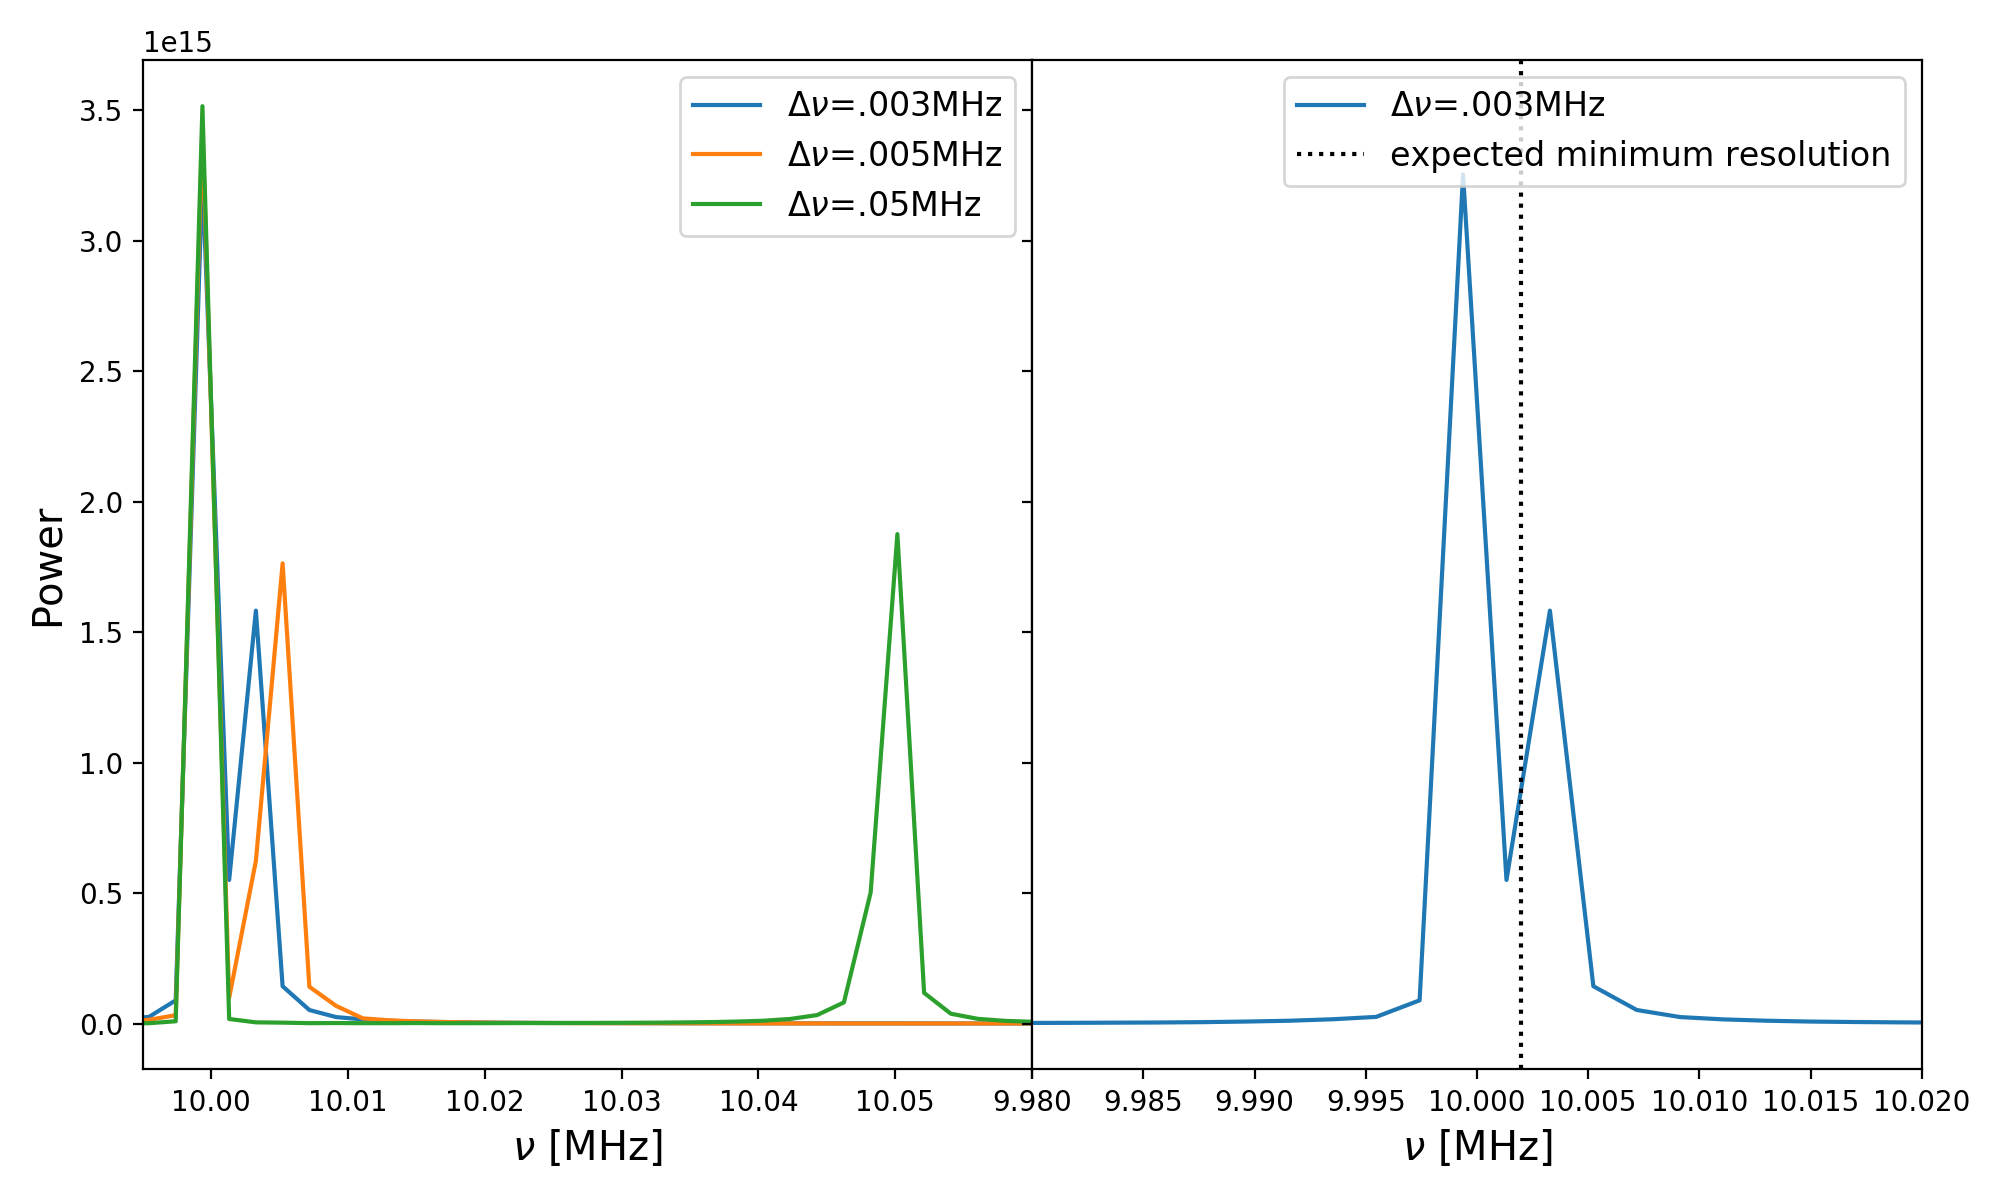

In [40]:
fig, axs = plt.subplots(ncols=2,
                        sharey=True,
                        gridspec_kw={'wspace': 0},
                        figsize=(10, 6))
for p, width in zip(fr_power, widths):
    axs[0].plot(np.fft.fftshift(freqs), np.fft.fftshift(p), label=width)
axs[0].set_xlim(.9995e1, 1.006e1)
axs[0].legend( fontsize='large')
axs[1].plot(np.fft.fftshift(freqs),
            np.fft.fftshift(fr_power[0]),
            label=widths[0])
axs[1].set_xlim(.998e1, 1.002e1)
axs[0].set_xlabel(r'$\nu$ [MHz]', fontsize='x-large')
axs[1].set_xlabel(r'$\nu$ [MHz]', fontsize='x-large')
axs[0].set_ylabel(r'Power', fontsize='x-large')
axs[1].axvline(10001977.848101266/1e6, 0, 3.5e15, ls=':', color='k', label='expected minimum resolution')

axs[1].legend( fontsize='large')
axs[0].tick_params(axis='both', which='major', labelsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=10)
# labels = [item.get_text() for item in axs[1].get_xticklabels()]
# axs[1].set_xticklabels([round(float(label), 2) for label in labels])


plt.setp(axs[0].get_xticklabels()[-1], visible=False)    
# plt.setp(axs[0].get_xticklabels()[1], visible=False)    




plt.tight_layout()
plt.savefig('Freq_res.pdf')

In [41]:
1e7+.8481012658228


10000000.848101266

In [42]:
%matplotlib notebook

In [43]:
31.25e6/(15800)

1977.8481012658228

In [44]:
10e6+

SyntaxError: invalid syntax (<ipython-input-44-0a4a21ed2dba>, line 1)

In [45]:
print('What the minimum should be Delta nu: ', 31.25e6 / (2*16000), 'Hz')

What the minimum should be Delta nu:  976.5625 Hz


# 5.6 Nyquist Window

* How do the spectra in different Nyquist windows compare?

In [5]:
import glob

In [6]:
#Read in the files from the Lab_1_waveforms folder
samples = 300
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_waveforms/'
files = sorted(glob.glob(path + '*'))
data_5v = [np.load(file)['arr_0'][200:500] for file in files]

path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_waveforms_2/'
files = sorted(glob.glob(path + '*'))
data_2v = [np.load(file)['arr_0'][200:16000] for file in files]

In [7]:
N = 15800
v_sample =31.25e6

times = np.linspace(-N /(2* v_sample), (N / 2-1)/v_sample, N)

window_freqs = [
    np.linspace(-i * v_sample / 2, i * v_sample / 2 * (1 - 2 / (N)),N)
    for i in np.arange(5, 6)
]
og_freqs = np.linspace(- v_sample / 2, v_sample / 2 * (1 - 2 / N), N)

In [8]:
nw_power = [
    np.abs(dft.dft(data_2v[0], t=times, f=freq, vsamp=v_sample))**2
    for freq in window_freqs
]
og_power = np.abs(dft.dft(data_2v[0], t=times, f=og_freqs, vsamp=v_sample))**2

NameError: name 'dft' is not defined

NameError: name 'nw_power' is not defined

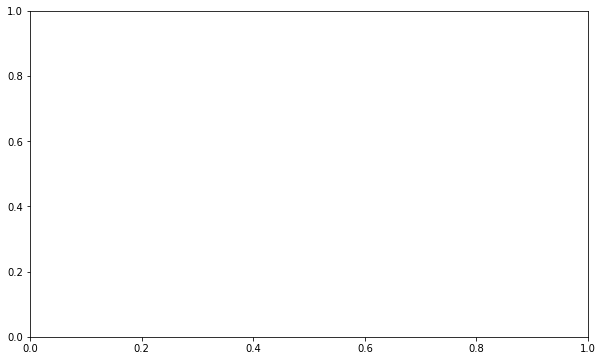

In [9]:
fig, axs = plt.subplots(ncols=1, gridspec_kw={'wspace':0},figsize=(10,6))
for p, f, w, l,a,c in zip(nw_power, window_freqs, np.arange(5,9), [2,2], ['-',':'], ['b', 'b']):
    axs.plot(f/1e6, p[1] / p[1].max(), label=r'Bandwidth $\pm$' + str(w)+r'$\nu_{s}/2$',lw=l, ls=a, c=c)
axs.plot(og_freqs/1e6, og_power[1]/og_power[1].max(), 'k:', label='Original Power', lw=3)
colors = ['red', 'orange', 'yellow', 'green', 'blue','indigo','violet', 'white']
for i,c in zip(np.arange(5), colors):
#     plt.axvline(v_sample/1e6/2*i, color='k', lw=.4, alpha=.8)
#     plt.axvline(-v_sample/1e6/2*i, color='k', lw=.4, alpha=.8)
    axs.fill_between(np.linspace(v_sample/1e6/2*i, v_sample/1e6/2*(i+1), 100), 0,1, alpha=.1, color=c, label='zone '+str(1+i))
    axs.fill_between(np.linspace(-v_sample/1e6/2*i, -v_sample/1e6/2*(i+1), 100), 0,1, alpha=.1, color=c)

plt.xlim(-v_sample/2/1e6*5,5*v_sample/2/1e6)
axs.tick_params(axis='both', which='major', labelsize=12)
# plt.ylim(0,1)
# axs[0].legend(loc='upper right', fontsize='x-large')
axs.set_xlabel(r'$\nu$ [MHz]', fontsize='x-large')
axs.set_ylabel('Normalized Power', fontsize='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
axs.tick_params(axis='both', which='major', labelsize=12)
# axs[1].tick_params(axis='both', which='major', labelsize=10)
# finally we invoke the legend (that you probably would like to customize...)

fig.legend(lines, labels, fontsize='12')
plt.tight_layout()
plt.savefig('windowing.pdf')

# 5.7 Noise in Data

TODO
Retake data with a smaller voltage range

In [15]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_noise_data/'
files = sorted(glob.glob(path + '*'))
n_data = [np.load(file)['arr_0'] for file in files]
n_data = [dat / dat.max() for dat in n_data]

* What is the mean voltage over this sample? 
* What is the variance? 
* The standard deviation (which, for a zero-mean signal, is the same as the root-mean-square, or rms)?

In [16]:
def noise_print(data):
    print('Mean Voltage: ', round(data.mean(), 4))
    print('Voltage Variance: ', round(data.var(), 4))
    print('Voltage STD: ', round(data.std(), 4))
    print('RMS: ', round(np.sqrt(np.mean(data**2)),4))

In [17]:
noise_print(n_data[3])

Mean Voltage:  -0.0007
Voltage Variance:  0.0555
Voltage STD:  0.2356
RMS:  0.2356


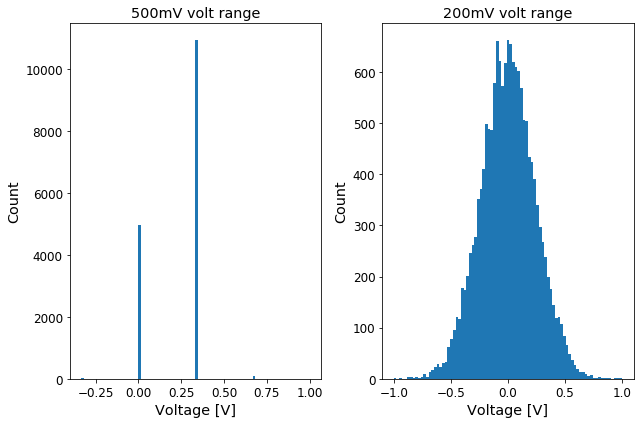

In [18]:
fig, ax = plt.subplots(ncols=2, sharey=False, gridspec_kw={'hspace':0}, figsize=(9,6))
ax[0].set_title('500mV volt range', fontsize='x-large')
ax[0].hist(n_data[2], bins=100)
ax[1].set_title('200mV volt range', fontsize='x-large')
ax[1].hist(n_data[3], bins=85)
ax[0].set_ylabel('Count', fontsize='x-large')
ax[1].set_ylabel('Count', fontsize='x-large')
ax[0].set_xlabel('Voltage [V]', fontsize='x-large')
ax[1].set_xlabel('Voltage [V]', fontsize='x-large')
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig('gaussian_hist.pdf')

* Overplot this theoretically-expected Gaussian. Does it look like your observed distribution?

In [19]:
blocks = np.arange(0, 16000 * 32, 16000)
power_500mV = []
power_200mV = []
for i in range(32):
    if i == 0:
        continue
    elif i == 1:
        power_500mV.append(np.abs(np.fft.fft(n_data[0][:blocks[i]]))**2)
        power_200mV.append(np.abs(np.fft.fft(n_data[1][:blocks[i]]))**2)


    else:
        power_500mV.append(np.abs(np.fft.fft(n_data[0][blocks[i - 1]:blocks[i]]))**2)
        power_200mV.append(np.abs(np.fft.fft(n_data[1][blocks[i - 1]:blocks[i]]))**2)

In [20]:
v_sample= 31.25
times = np.linspace(0, 16000 / (v_sample*1e6), 16000)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

In [21]:
power_mean_200mV = [np.mean(np.asarray(power_200mV[:int(2**n)]), axis=0) for n in range(0,7)]
var = []
for p in power_mean_200mV:
    var.append(p[500:1000].var())

In [44]:

var = np.asarray(var[:6])
blocks = np.array([2**n for n in range(6)])

In [45]:
len(var)

6

In [57]:
SN = np.array([.6/np.sqrt(v) for v in var])
SN_theory = np.array([np.sqrt(2**N) for N in range(0, 6)])

In [61]:
SN, SN[0]*SN_theory, 


(array([0.46448883, 0.61244651, 0.85478571, 1.08112249, 1.1665718 ,
        1.23210822]),
 array([0.46448883, 0.6568864 , 0.92897765, 1.3137728 , 1.85795531,
        2.6275456 ]),
 array([0.        , 0.07256126, 0.08679596, 0.2151933 , 0.59266263,
        1.13256072]))

In [68]:
data = np.concatenate((blocks[np.newaxis], var[np.newaxis], SN[np.newaxis], SN[0]*SN_theory[np.newaxis], (np.abs(SN-SN[0]*SN_theory)/SN*100)[np.newaxis]))

In [69]:
print(tabulate(data.T, headers=['Blocks of Averaging', 'Variance','S/N', 'S/N theoretical', 'S/N error'], tablefmt='latex'))

\begin{tabular}{rrrrr}
\hline
   Blocks of Averaging &   Variance &      S/N &   S/N theoretical &   S/N error \\
\hline
                     1 &   1.6686   & 0.464489 &          0.464489 &     0       \\
                     2 &   0.959768 & 0.612447 &          0.656886 &     7.25613 \\
                     4 &   0.492706 & 0.854786 &          0.928978 &     8.6796  \\
                     8 &   0.308001 & 1.08112  &          1.31377  &    21.5193  \\
                    16 &   0.264533 & 1.16657  &          1.85796  &    59.2663  \\
                    32 &   0.23714  & 1.23211  &          2.62755  &   113.256   \\
\hline
\end{tabular}


In [422]:
(var[0]-var[-1])/var[0]

0.8578807740023272

In [399]:
blocks

array([ 1,  2,  4,  8, 16, 32])

In [388]:
std = [np.std(power_mean_200mV[i]) for i in range(6)]

In [420]:
freqs[500], freqs[1000]

(976501.4648434856, 1953002.9296869712)

<IPython.core.display.Javascript object>


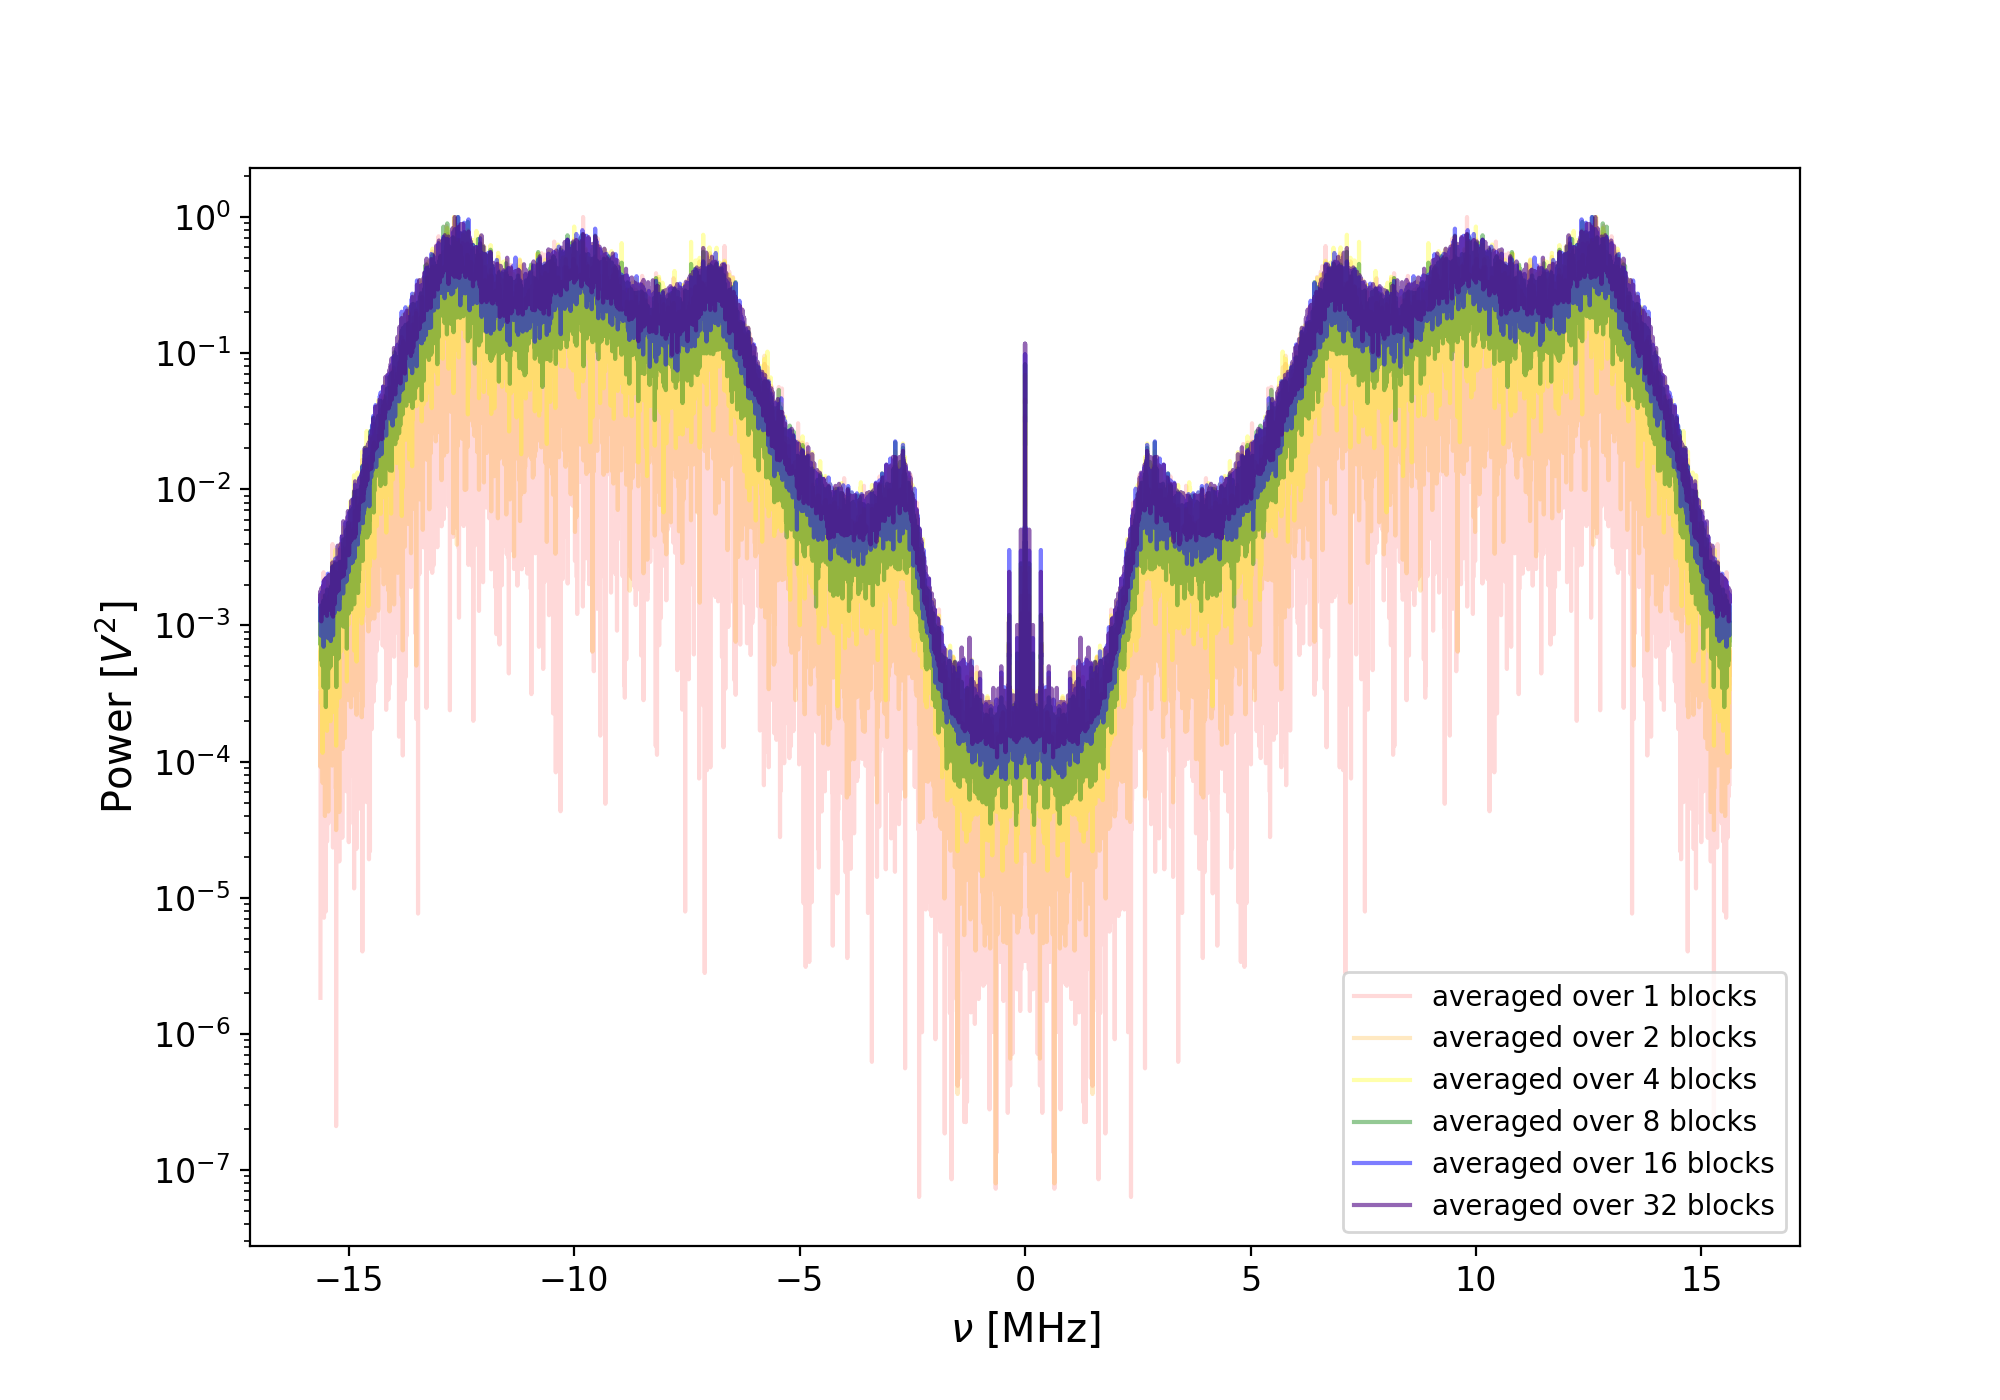

<ipython-input-400-129e4d2a74f2>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [400]:
fig, axs = plt.subplots( gridspec_kw={'wspace':.3}, figsize=(10,7))
# colors = ['r', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
# for p,g,x, i,c in zip(acfs, gaussians,xs, np.arange(0,6), colors):
#     axs[1].hist(p, bins=5000, alpha =.15+i*.09 , label='averaged over ' +str(2**i)+' blocks', color=c)
#     axs[1].plot(x,g, ':', c=c)
# # axs.legend(loc='upper right', fontsize='12')
# axs[1].set_xlabel(r'Auto-Correlation [$\propto V^2$]',fontsize='x-large')
# axs[1].set_ylabel('Counts',fontsize='x-large')
# axs[1].tick_params(axis='both', which='major', labelsize=12)
# axs[1].tick_params(axis='both', which='major', labelsize=12)
# axs[1].set_xlim(-15, 15)
# axs[1].set_ylim(0,1000)

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# # finally we invoke the legend (that you probably would like to customize...)

# fig.legend(lines, labels)

for p, i,c in zip(power_mean_200mV, np.arange(0,6), colors):
    axs.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(p/p.max()), alpha =.15+i*.09 , c=c , label='averaged over ' +str(2**i)+' blocks')
# axs[1].legend(loc='lower right')
axs.set_xlabel(r'$\nu$ [MHz]',fontsize='x-large')
axs.set_ylabel('Power [$V^2$]',fontsize='x-large')
axs.tick_params(axis='both', which='major', labelsize=12)
axs.tick_params(axis='both', which='major', labelsize=12)
axs.legend()



# for i in range(6):
# axs[1,0].plot(std)
plt.tight_layout()
plt.savefig('Noise_power.pdf')

In [331]:
xss = np.array([18,12,10,7,5,4,3])

In [349]:
def gaussian(x, mean, std, maximum):
    return  maximum* np.exp(-.5*((x-mean)/std)**2)

In [350]:
inv_p = [np.fft.ifft(np.sqrt(p)) for p in power_mean_200mV]

In [366]:
acfs = [np.fft.ifft(p) for p in power_mean_200mV]

In [352]:
X = np.array([np.arange(ac.size) for ac in acfs])
x = np.array([np.sum(X*ac)/np.sum(ac) for ac in acfs])
width = np.array([np.sqrt(np.abs(np.sum((Xi-xi)**2*ac)/np.sum(ac))) for ac, Xi, xi in zip(acfs, X, x)])

maxs = np.array([ac.max() for ac in acfs])

fit = []
for xi, widthi, Xi, maxsi in zip(x, width, X, maxs):
    fi = lambda t : maxsi*np.exp(-(t-xi)**2/(2*widthi**2)) 
    fit.append(fi(Xi))

In [367]:
np.histogram(acfs[0], bins=5000)[0].max()
np.histogram_bin_edges(acfs[0], bins=5000)[0]

(-203.16349583828776-2.3270274596143282e-15j)

In [358]:
min_x = [p.min() for p in acfs]
max_x = [p.max() for p in acfs]
xs = [np.linspace(mi, ma, 1000) for mi,ma in zip(min_x, max_x)]
maxs = [np.histogram(p, bins=5000)[0].max() for p in acfs]
gaussians = [gaussian(x, 0, p.var(), maxs) for p,maxs,x in zip(acfs, maxs, xs) ]


<IPython.core.display.Javascript object>


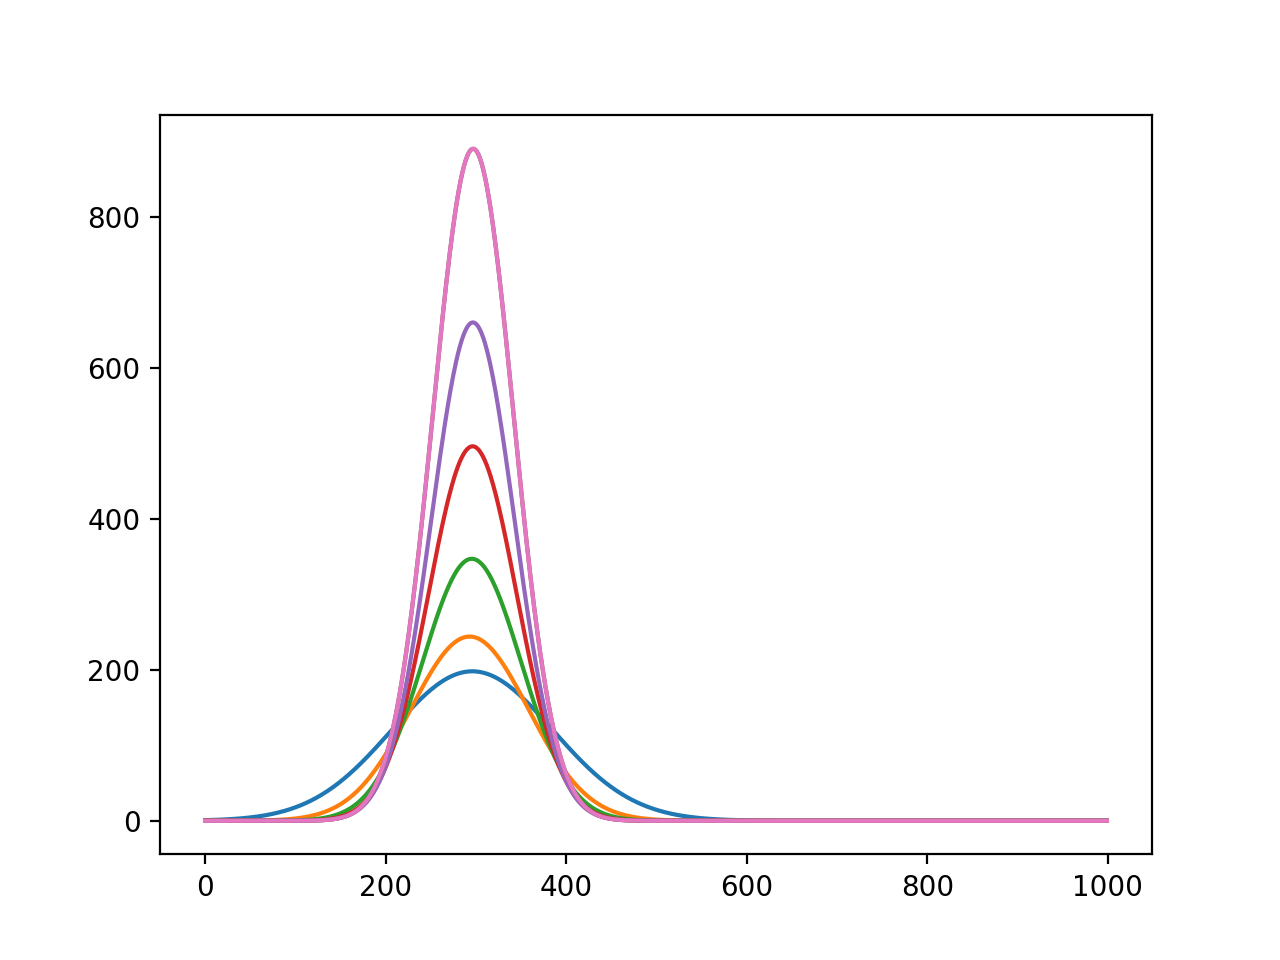

In [359]:
plt.figure()
for g in gaussians:
    plt.plot(g)

* How does SNR depend on N? (Hint: SNR is proportional to Nx for some value of x.)

In [1079]:
FWHM = [2*np.sqrt(2*np.log(2))*p.std() for p in inv_p]

In [1080]:
FWHM

[0.40898492561262667,
 0.4042267986469689,
 0.4065307697456377,
 0.40465637791822545,
 0.40399638505512725,
 0.4040877617747217,
 0.4040877617747217]

In [1081]:
acfs[0].max()

(482.6420927467301+0j)

<ipython-input-1082-fa046cbadb2d>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


<IPython.core.display.Javascript object>


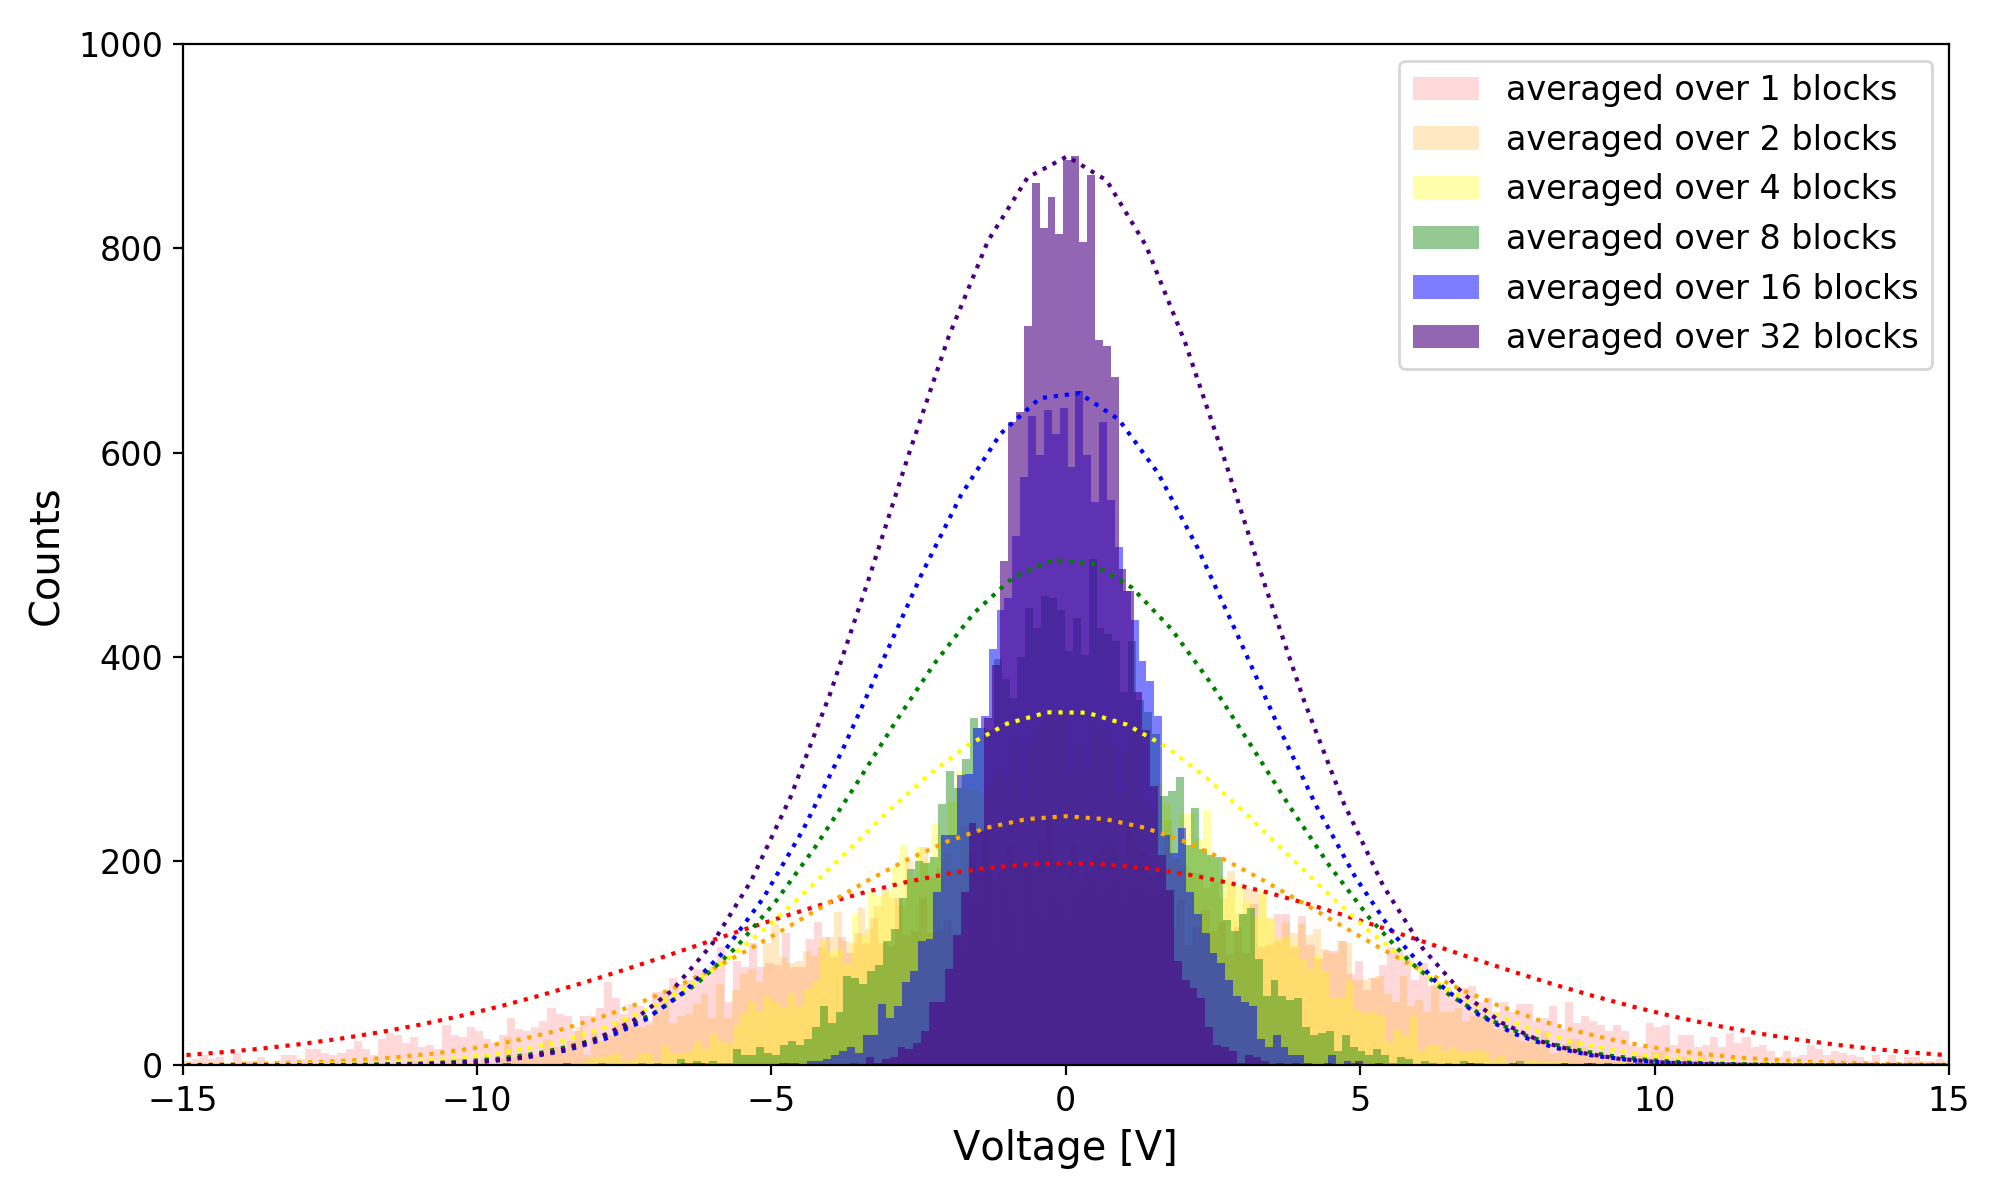

In [1082]:
plt.figure(figsize=(10,6))
colors = ['r', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
for p,g,x, i,c in zip(acfs, gaussians,xs, np.arange(0,6), colors):
    plt.hist(p, bins=5000, alpha =.15+i*.09 , label='averaged over ' +str(2**i)+' blocks', color=c)
    plt.plot(x,g, ':', c=c)
plt.legend(loc='upper right', fontsize='12')
plt.xlabel(r'Voltage [V]',fontsize='x-large')
plt.ylabel('Counts',fontsize='x-large')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0,1000)
plt.xlim(-15, 15)
# for i in range(6):
# axs[1,0].plot(std)
plt.tight_layout()

In [ ]:
np.array([15,20,9,8,6,5,3])

In [696]:
noise_print(np.sqrt(power_mean_200mV[0]))

Mean Voltage:  15.3972
Voltage Variance:  245.5684
Voltage STD:  15.6706
RMS:  21.9691


In [699]:
noise_print(np.fft.ifft(np.sqrt(power_mean_200mV[-1])))

Mean Voltage:  (0.0007+0j)
Voltage Variance:  0.0294
Voltage STD:  0.1716
RMS:  (0.1716-0j)


In [700]:
s

[2.7906326425554364,
 1.9732752653514836,
 1.611172507388738,
 1.3953163212777182,
 1.2480088577967656,
 1.1392710056359094,
 1.0547599961058125,
 0.9866376326757418,
 0.9302108808518121,
 0.8824755263289706,
 0.8414074002794871,
 0.805586253694369,
 0.773982237209015,
 0.7458279457707165,
 0.7205382499999999,
 0.6976581606388591,
 0.6768278322089762,
 0.6577584217838279,
 0.6402150356550005,
 0.6240044288983828,
 0.6089659676821395,
 0.5949648784781693,
 0.5818871303109929,
 0.5696355028179547,
 0.5581265285110872,
 0.5472880884484296,
 0.5370575024629126,
 0.5273799980529063,
 0.5182074722872516,
 0.5094974826792878,
 0.5012124186119461,
 0.4933188163378709,
 0.4857867890495052,
 0.4785895498507579,
 0.4717030102480021,
 0.46510544042590607,
 0.45877718037738685,
 0.45270039312923815,
 0.4468588530006136,
 0.4412377631644853,
 0.43582359783702423,
 0.4306039652598688,
 0.4255674883132026,
 0.42070370013974356,
 0.41600295259892184,
 0.4114563357280834,
 0.4070556066800957,
 0.4027931

<ipython-input-695-c68fdcc971f2>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


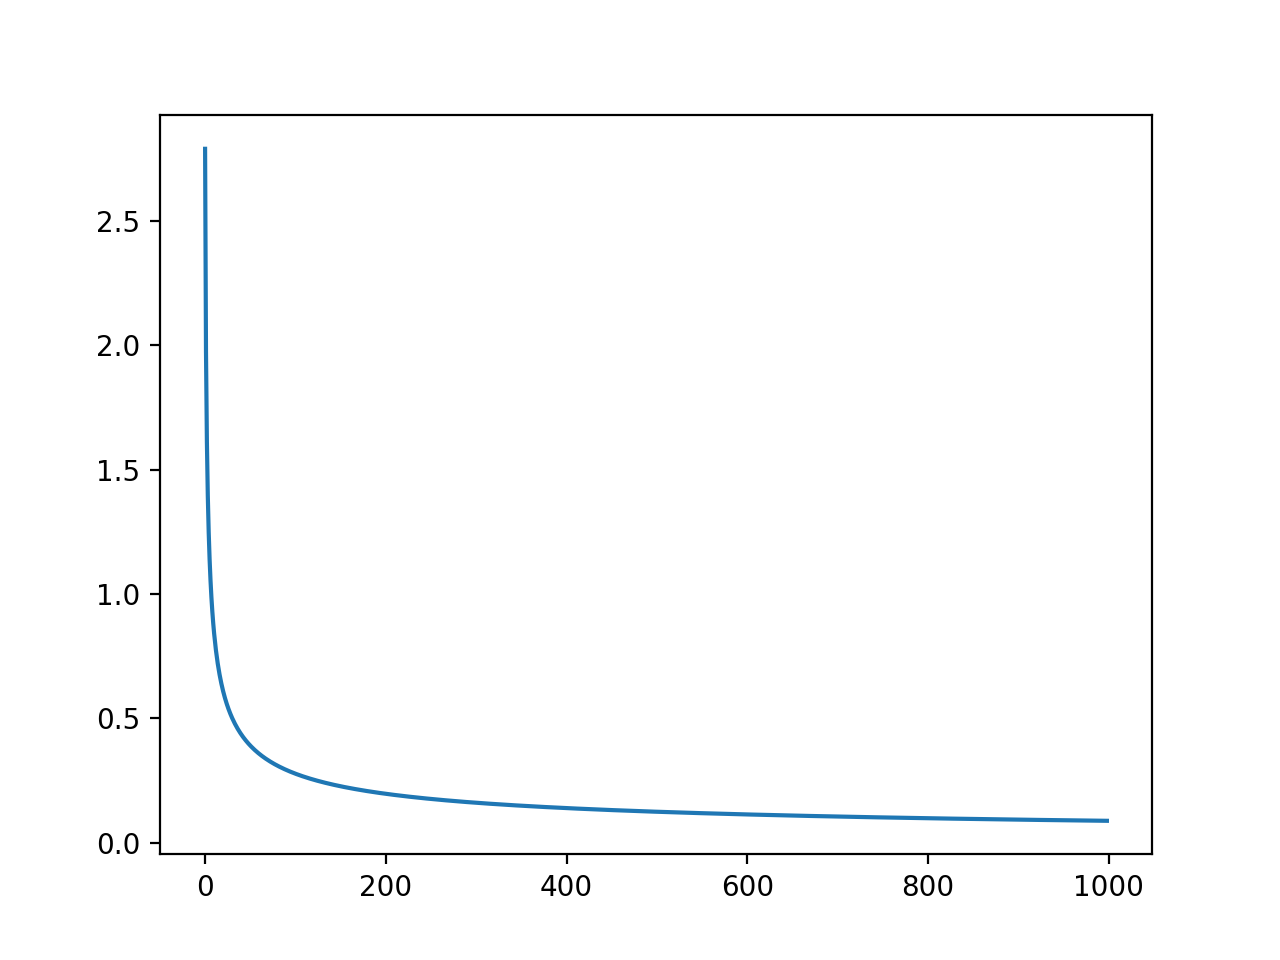

In [695]:
s = [864.6459/np.sqrt(i*6*16000) for i in range(1,1000)]
plt.figure()
plt.plot(s)

In [58]:
n_data_200 = [n_data[1][int(i*16000)+200:int(i*16000)+400] for i in range(32)]

In [59]:
def manual_correlate(dat_1, dat_2):
    return np.fft.ifft(np.fft.fft(dat_1)*np.conj(np.fft.fft(dat_2)))

def power_auto_correlate(dat_1):
    p = np.abs(np.fft.fft(dat_1))**2
    return np.fft.ifft(p)

In [60]:
ac = np.mean([manual_correlate(dat, dat) for dat in n_data_200], axis=0)
power_ac = np.mean([power_auto_correlate(dat) for dat in n_data_200], axis=0)
spac = np.mean([correlate(dat, dat, mode='same') for dat in n_data_200], axis=0)
npac = np.mean([np.correlate(dat, dat, mode='same') for dat in n_data_200], axis=0)

<ipython-input-60-8e3c36e0c596>:3: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  spac = np.mean([correlate(dat, dat, mode='same') for dat in n_data_200], axis=0)


In [61]:
times = np.linspace(0, 200 / (v_sample*1e6), 200)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

<IPython.core.display.Javascript object>


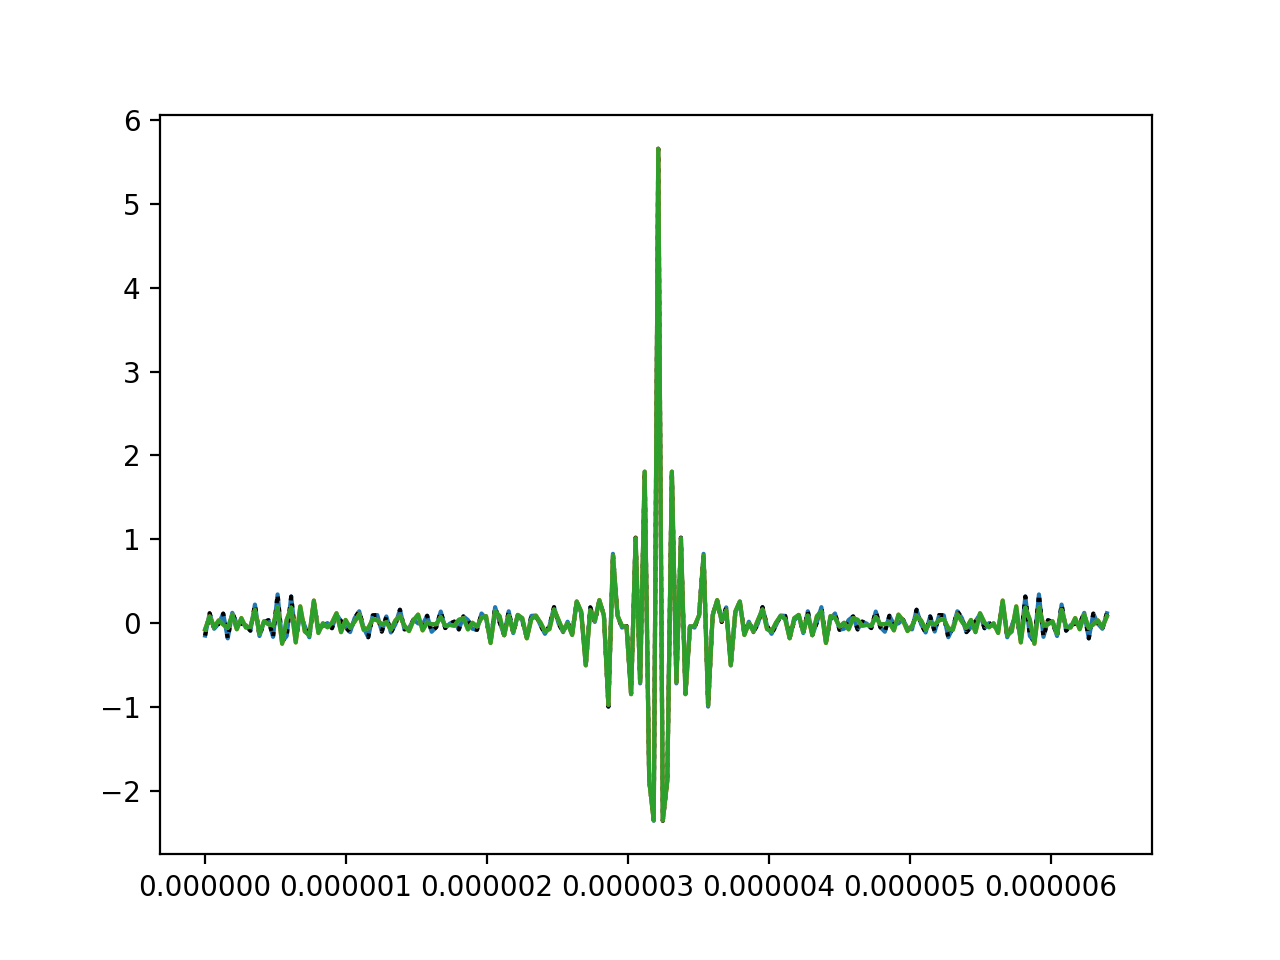

/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [62]:
plt.figure()
plt.plot(times, np.fft.fftshift(ac))
plt.plot(times, np.fft.fftshift(power_ac), ':k')
plt.plot(times, spac)
plt.plot(times, npac)




* Are they identical?

#### 7.1 DSB Mixer

In [264]:
v_sample = 61.5e6
v_lo = v_sample/4
delta_nu = .05*v_lo

In [265]:
v_rf = v_lo+np.array([delta_nu, -delta_nu])

In [266]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_DSB/'
files = sorted(glob.glob(path + '*'))
dsb_data = [np.load(file)['arr_0'][200:16000] for file in files]

In [267]:
files

['/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_DSB/10MHz_lower_sb.npz',
 '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_DSB/10MHz_upper_sb.npz']

In [268]:
N=15800
times = np.linspace(0, N / (v_sample), N)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

<IPython.core.display.Javascript object>


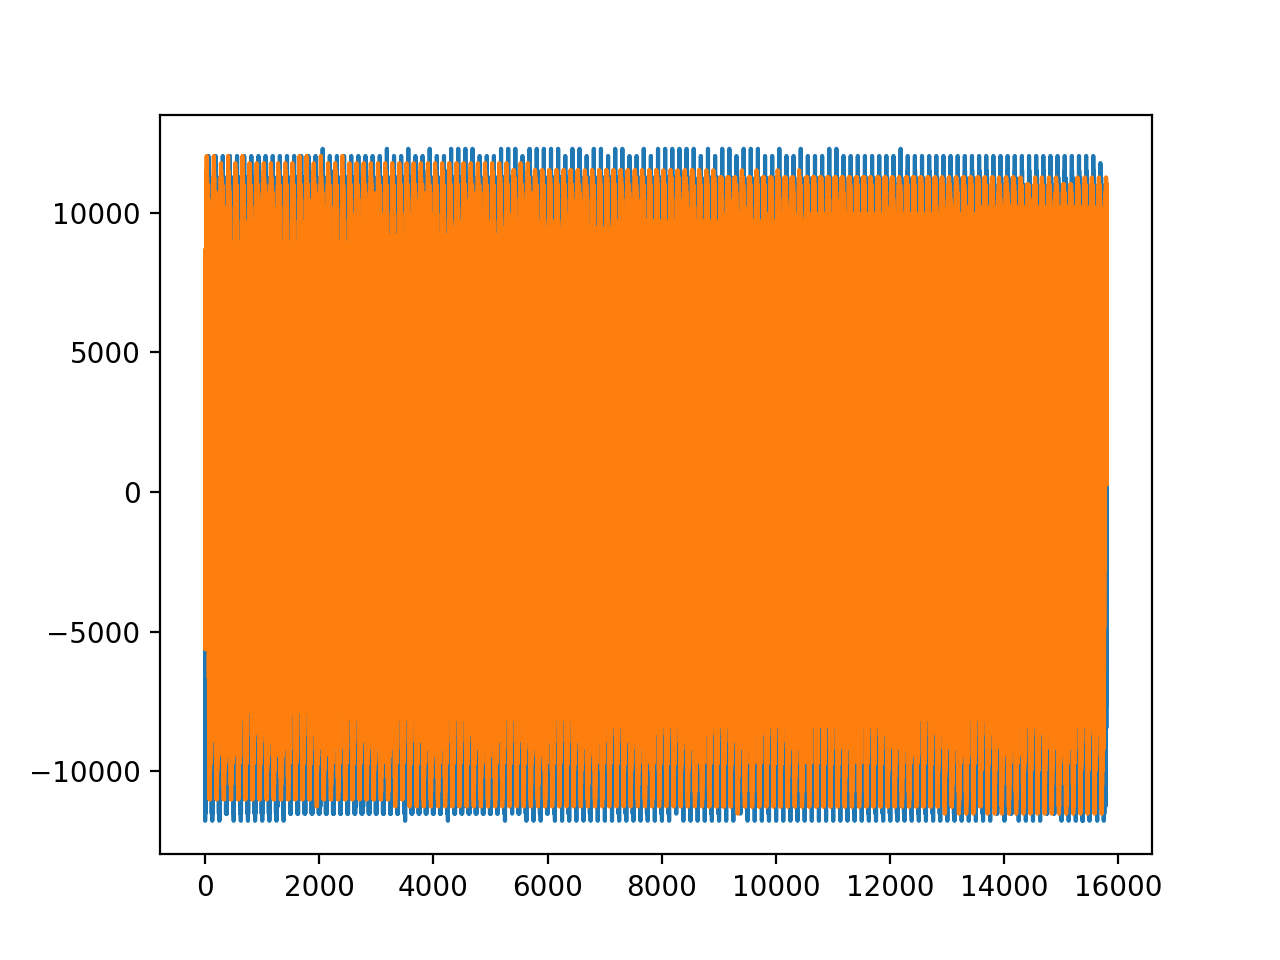

In [269]:
plt.figure()
plt.plot(dsb_data[0])
plt.plot(dsb_data[1])

In [270]:
dsb_power = [np.abs(np.fft.fft(dat))**2 for dat in dsb_data]
dsb_power_test = np.fft.fft(dsb_data[0]+dsb_data[1])

<IPython.core.display.Javascript object>


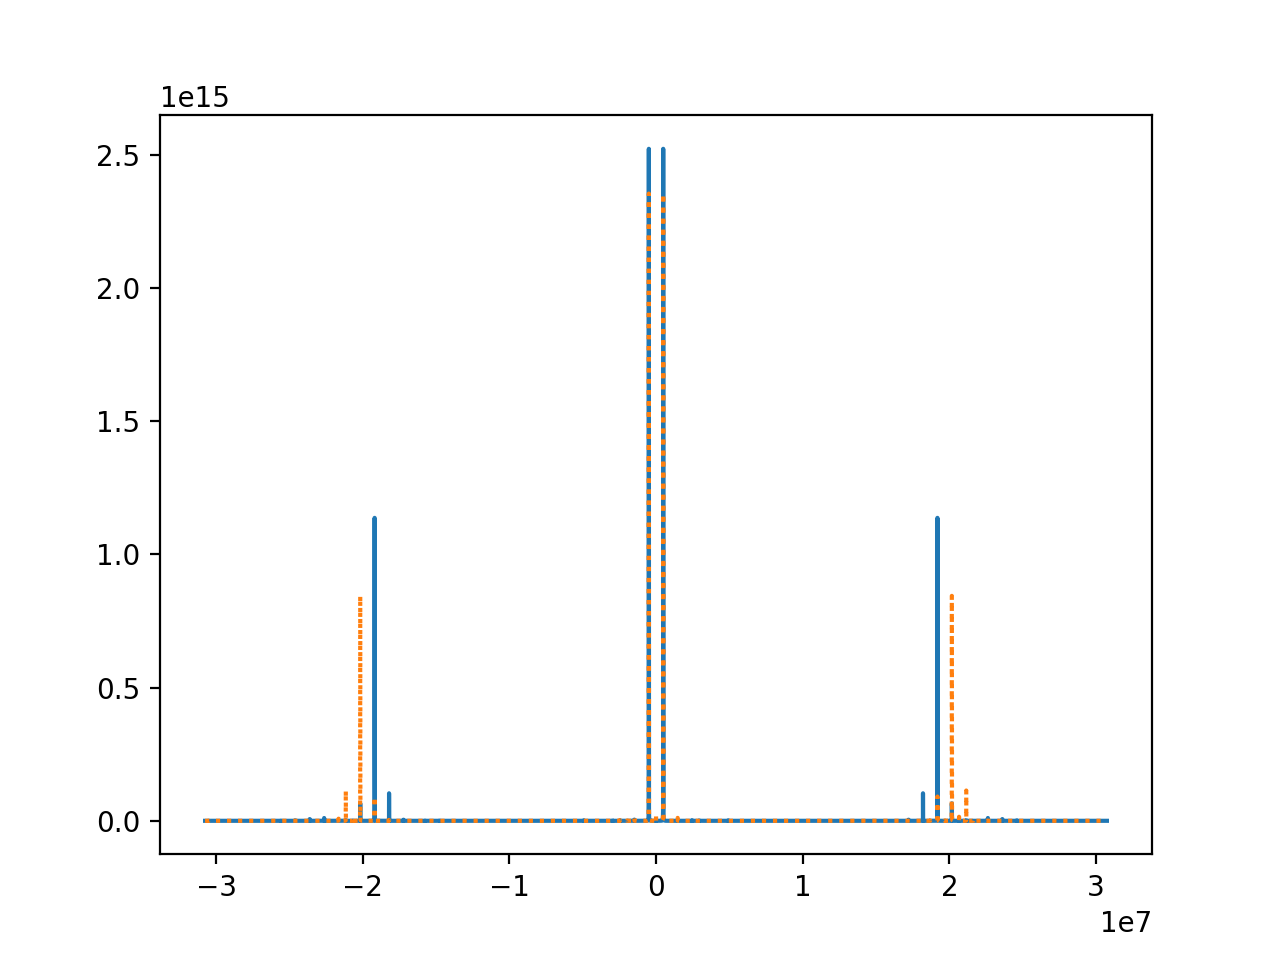

In [271]:
plt.figure()
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(dsb_power[0]))
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(dsb_power[1]), ':')
# plt.xlim(-12,12)

In [272]:
np.where(freqs< -9.5e6)[0]
# np.where(freqs == 768751)

array([ 7900,  7901,  7902, ..., 13357, 13358, 13359])

In [290]:
filtered_data = []
filtered_power = []
power = []
for dat in dsb_data:
    E = np.fft.fft(dat)
    power.append(np.abs(E)**2)
    top = np.where(freqs< -9.5e6)[0][-1]
    bottom = np.where(freqs> 9.5e6)[0][0]


    E[int(bottom):int(top)] = 0 +0.j
    filtered_data.append(np.fft.ifft(E))
    filtered_power.append(np.abs(E)**2)


<IPython.core.display.Javascript object>


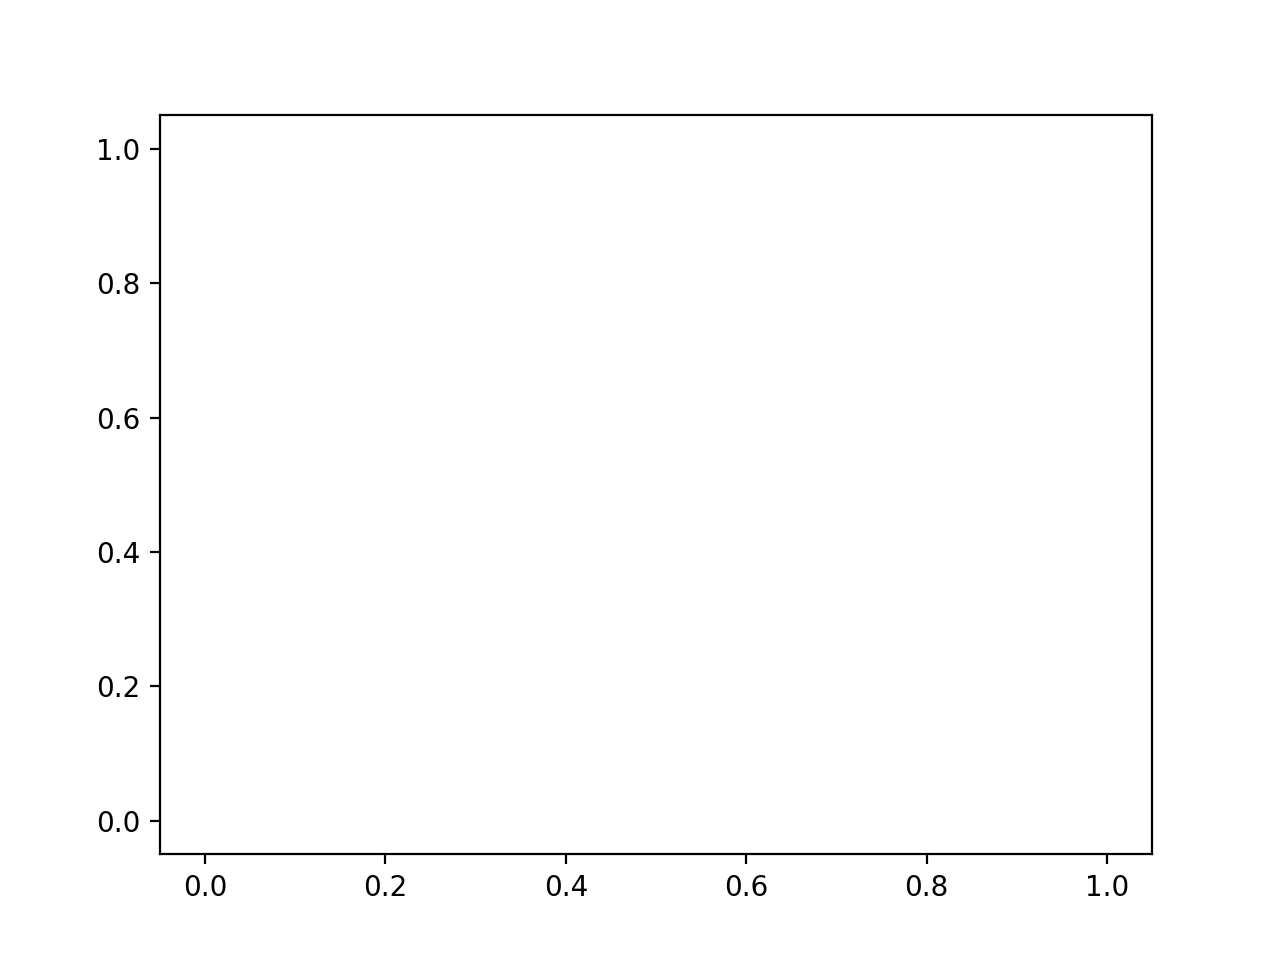

[]

In [262]:
plt.figure()
plt.plot()

In [263]:
dsb_dat = 

SyntaxError: invalid syntax (<ipython-input-263-ef7d776e2907>, line 1)

In [288]:
acf = np.fft.ifft(np.fft.fft(dsb_data[1][:200]) *np.conj(np.fft.fft(dsb_data[1][:200])))


<IPython.core.display.Javascript object>


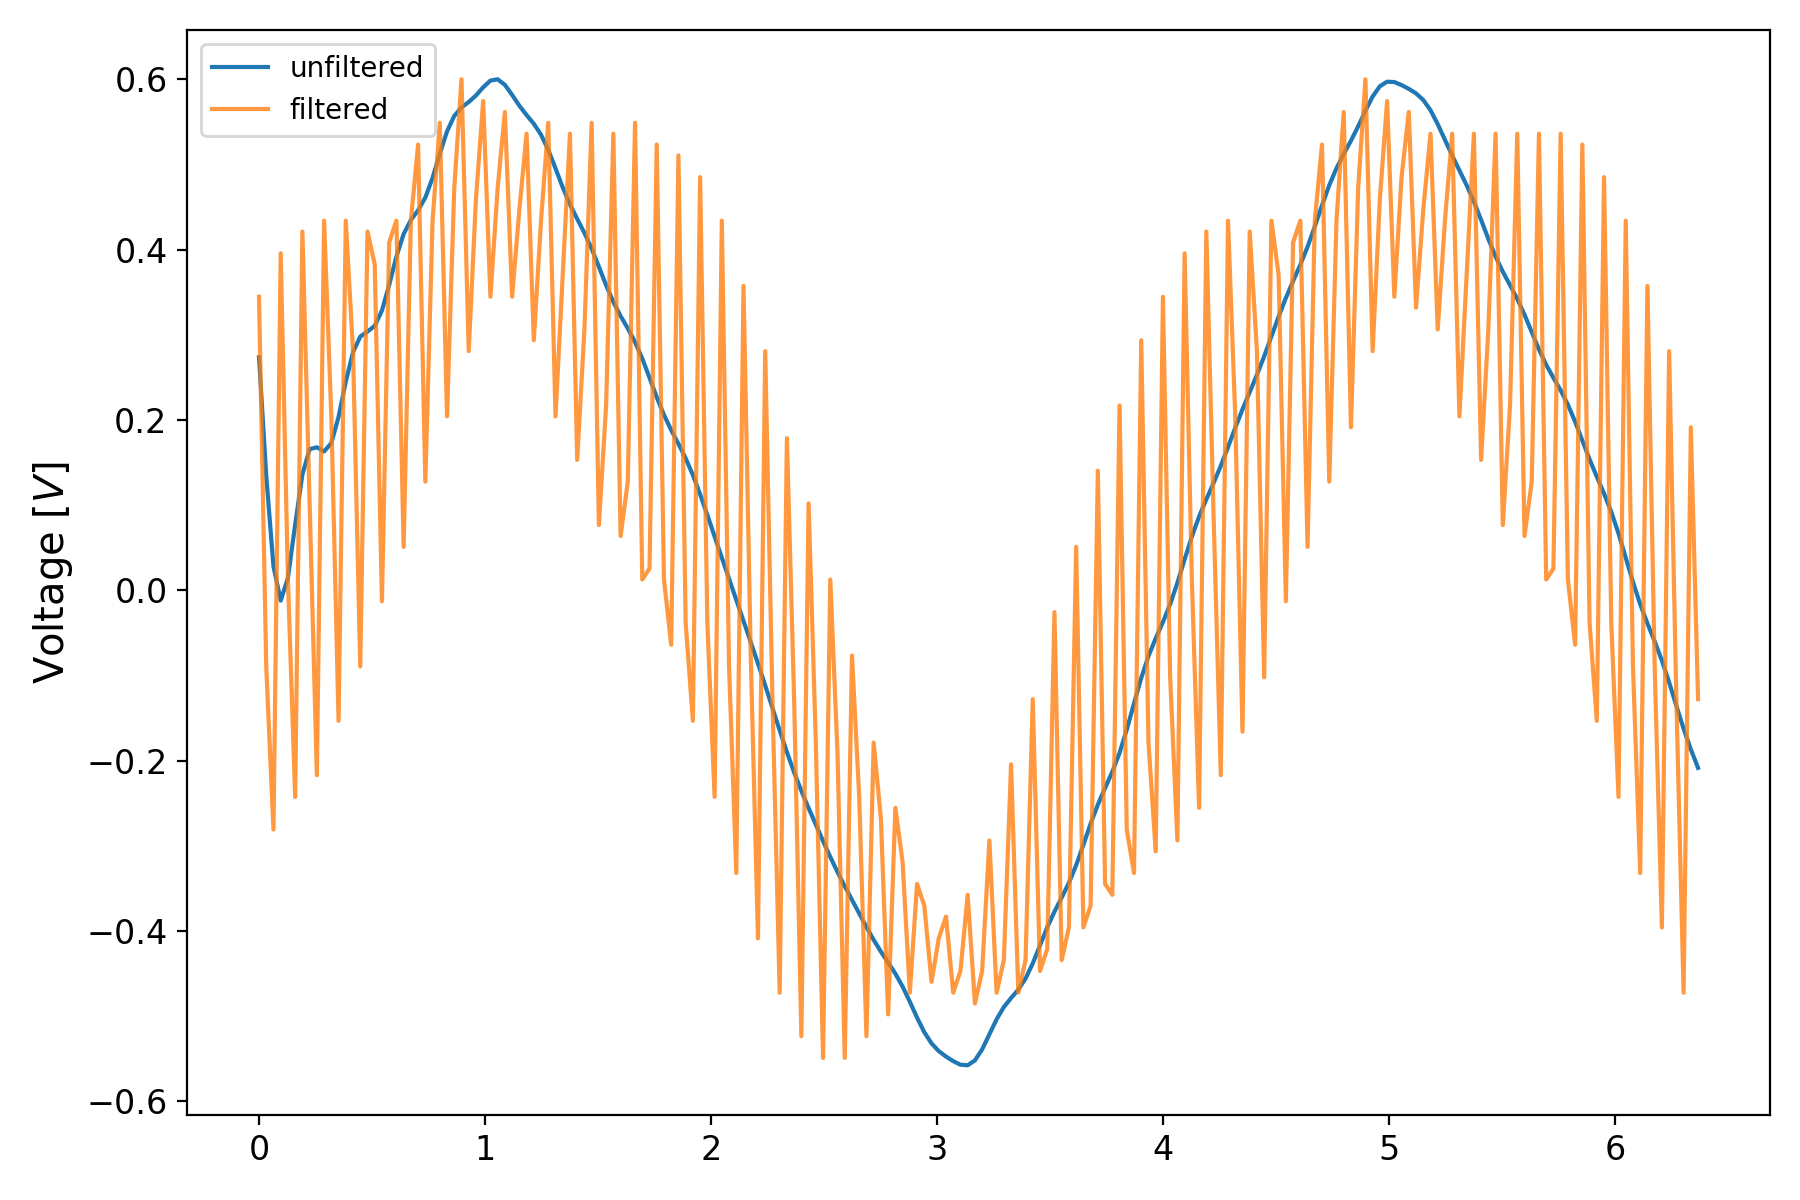

/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [426]:
fig, ax1 = plt.subplots( gridspec_kw={'hspace':0}, figsize=(9,6))
ax1.plot(times[:200]*1e6, np.fft.ifft(E)[:200]/np.fft.ifft(E)[:200].max()*.6, label='unfiltered')
ax1.plot(times[:200]*1e6, dsb_data[1][:200]/dsb_data[1][:200].max()*.6, alpha=.8, label='filtered')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax2.plot(times[:200]*1e6, np.fft.ifft(np.abs(E)**2)[:200]/(np.fft.ifft(np.abs(E)**2)[:200].max()), lw=.8, label='filtered ACF')
# ax2.plot(times[:200]*1e6, np.fft.ifft(power[1][:200])/np.fft.ifft(power[1][:200]).max(), alpha=.8, label='ACF')


ax1.legend()
# ax2.legend()
# ax2.set_xlabel(r'time [$\mu s$]', fontsize='x-large')
ax1.set_ylabel(r'Voltage [$V$]', fontsize='x-large')
# ax2.set_ylabel(r'Normalized ACF', fontsize='x-large')

# ax2.tick_params(axis='both', which='major', labelsize=12)
# ax2.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig('filtering.pdf')

# 7.3.1

In [10]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB/'
files = sorted(glob.glob(path + '*'))
ssb_data = np.array([np.load(file)['arr_0'][200:16000] + 1.0j*np.load(file)['arr_0'][16200:32000] for file in files])
# ssb_data_image = [ for file in files]


N=15800
times = np.linspace(0, N / (v_sample), N)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))


In [11]:
ssb_data.shape

(2, 15800)

In [12]:
files

['/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB/lower.npz',
 '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB/upper.npz']

In [13]:
ssb_power = [np.abs(np.fft.fft(dat))**2 for dat in ssb_data]
ssb_power_test = np.fft.fft(ssb_data[0]+ssb_data[1])

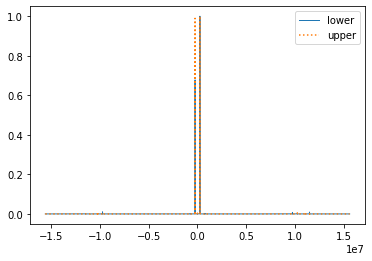

In [14]:
plt.figure()
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ssb_power[0]/ssb_power[0].max()), lw=1, label='lower')
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ssb_power[1]/ssb_power[1].max()),':', label='upper')
plt.legend()

# plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ssb_power_image/ssb_power_image.max()), '--')

# 7.3.2

In [373]:
v_lo

15375000.0

In [374]:
files

['/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB/lower.npz',
 '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB/upper.npz']

<IPython.core.display.Javascript object>


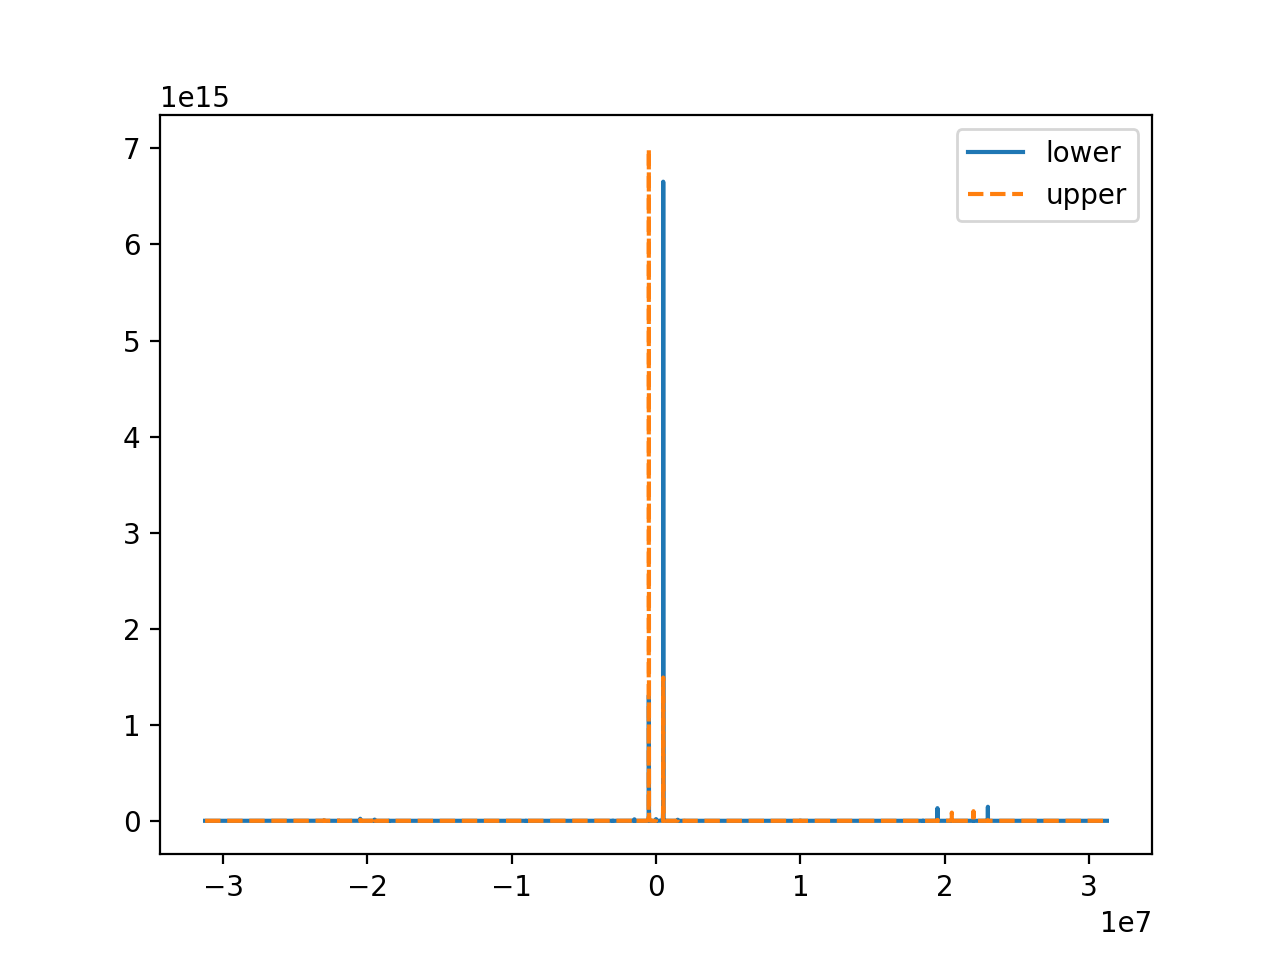

In [375]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB90/'
files = sorted(glob.glob(path + '*'))
ssb_data_90 = [np.load(file)['arr_0'][200:16000]+1.0j*np.load(file)['arr_0'][16200:32000] for file in files]


v_sample = 62.5e6
N=15800
times = np.linspace(0, N / (v_sample), N)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

ssb_90_power = [np.abs(np.fft.fft(dat))**2 for dat in ssb_data_90]
ssb_90_power_test = np.fft.fft(ssb_data_90[0]+ssb_data_90[1])


plt.figure()
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ssb_90_power[0]), label='lower')
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ssb_90_power[1]), '--', label='upper')
plt.legend()


<IPython.core.display.Javascript object>


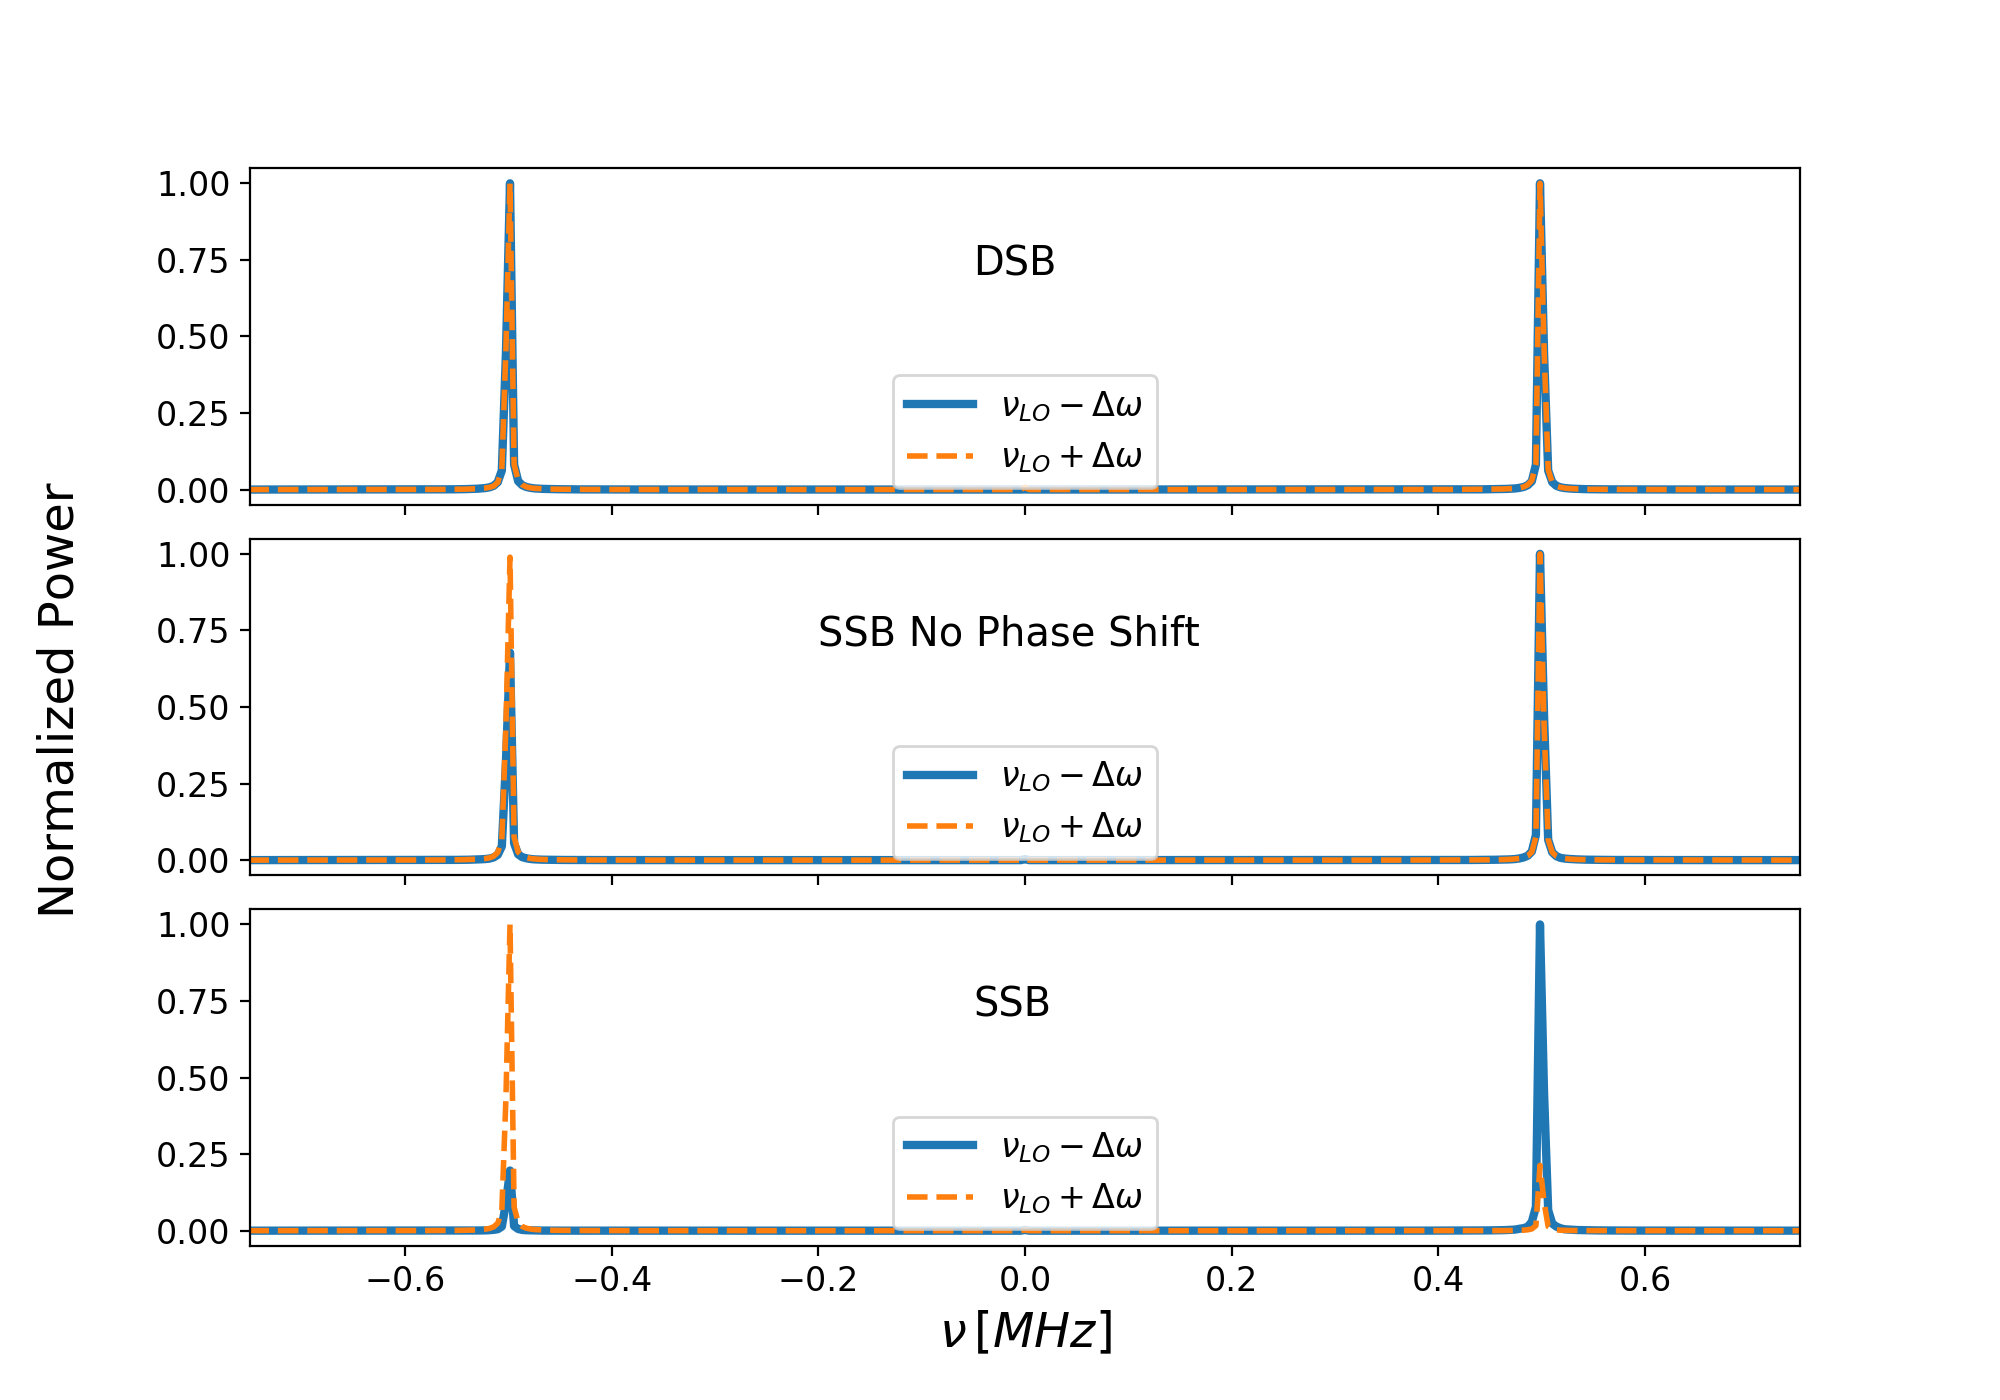

In [378]:
fig, axs = plt.subplots(nrows=3, sharex=True, gridspec_kw={'hspace':.1}, figsize=(10,7))

axs[0].plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(dsb_power[0]/dsb_power[0].max()),  lw=3, label=r'$\nu_{LO}-\Delta\omega$')
axs[0].plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(dsb_power[1]/dsb_power[1].max()),  ls='--', lw=2, label=r'$\nu_{LO}+\Delta\omega$')
axs[0].legend(fontsize='12', loc='lower center')
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].annotate('DSB', (-.05,.7), fontsize='x-large')
axs[0].set_xlim(-.75,.75)





axs[1].plot(np.fft.fftshift(freqs/1e6),np.fft.fftshift(ssb_power[0]/ssb_power[0].max()),  lw=3, label=r'$\nu_{LO}-\Delta\omega$')
axs[1].plot(np.fft.fftshift(freqs/1e6),np.fft.fftshift(ssb_power[1]/ssb_power[1].max()),  ls='--', lw=2, label=r'$\nu_{LO}+\Delta\omega$')
axs[1].legend(fontsize='12')
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].annotate('SSB No Phase Shift', (-.2,.7), fontsize='x-large')

axs[1].set_xlim(-.75,.75)


axs[2].plot(np.fft.fftshift(freqs/1e6),np.fft.fftshift(ssb_90_power[0]/ssb_90_power[0].max()),  lw=3, label=r'$\nu_{LO}-\Delta\omega$')
axs[2].plot(np.fft.fftshift(freqs/1e6),np.fft.fftshift(ssb_90_power[1]/ssb_90_power[1].max()),  ls='--', lw=2, label=r'$\nu_{LO}+\Delta\omega$')
axs[2].legend(fontsize='12')
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].set_xlabel(r'$\nu\, [MHz]$', fontsize='xx-large')
axs[2].annotate('SSB', (-.05,.7), fontsize='x-large')
axs[2].set_xlim(-.75,.75)
fig.text(0.03, 0.5, 'Normalized Power', ha='center', va='center', rotation='vertical', fontsize='xx-large')
plt.savefig('Mixers.pdf')


<IPython.core.display.Javascript object>


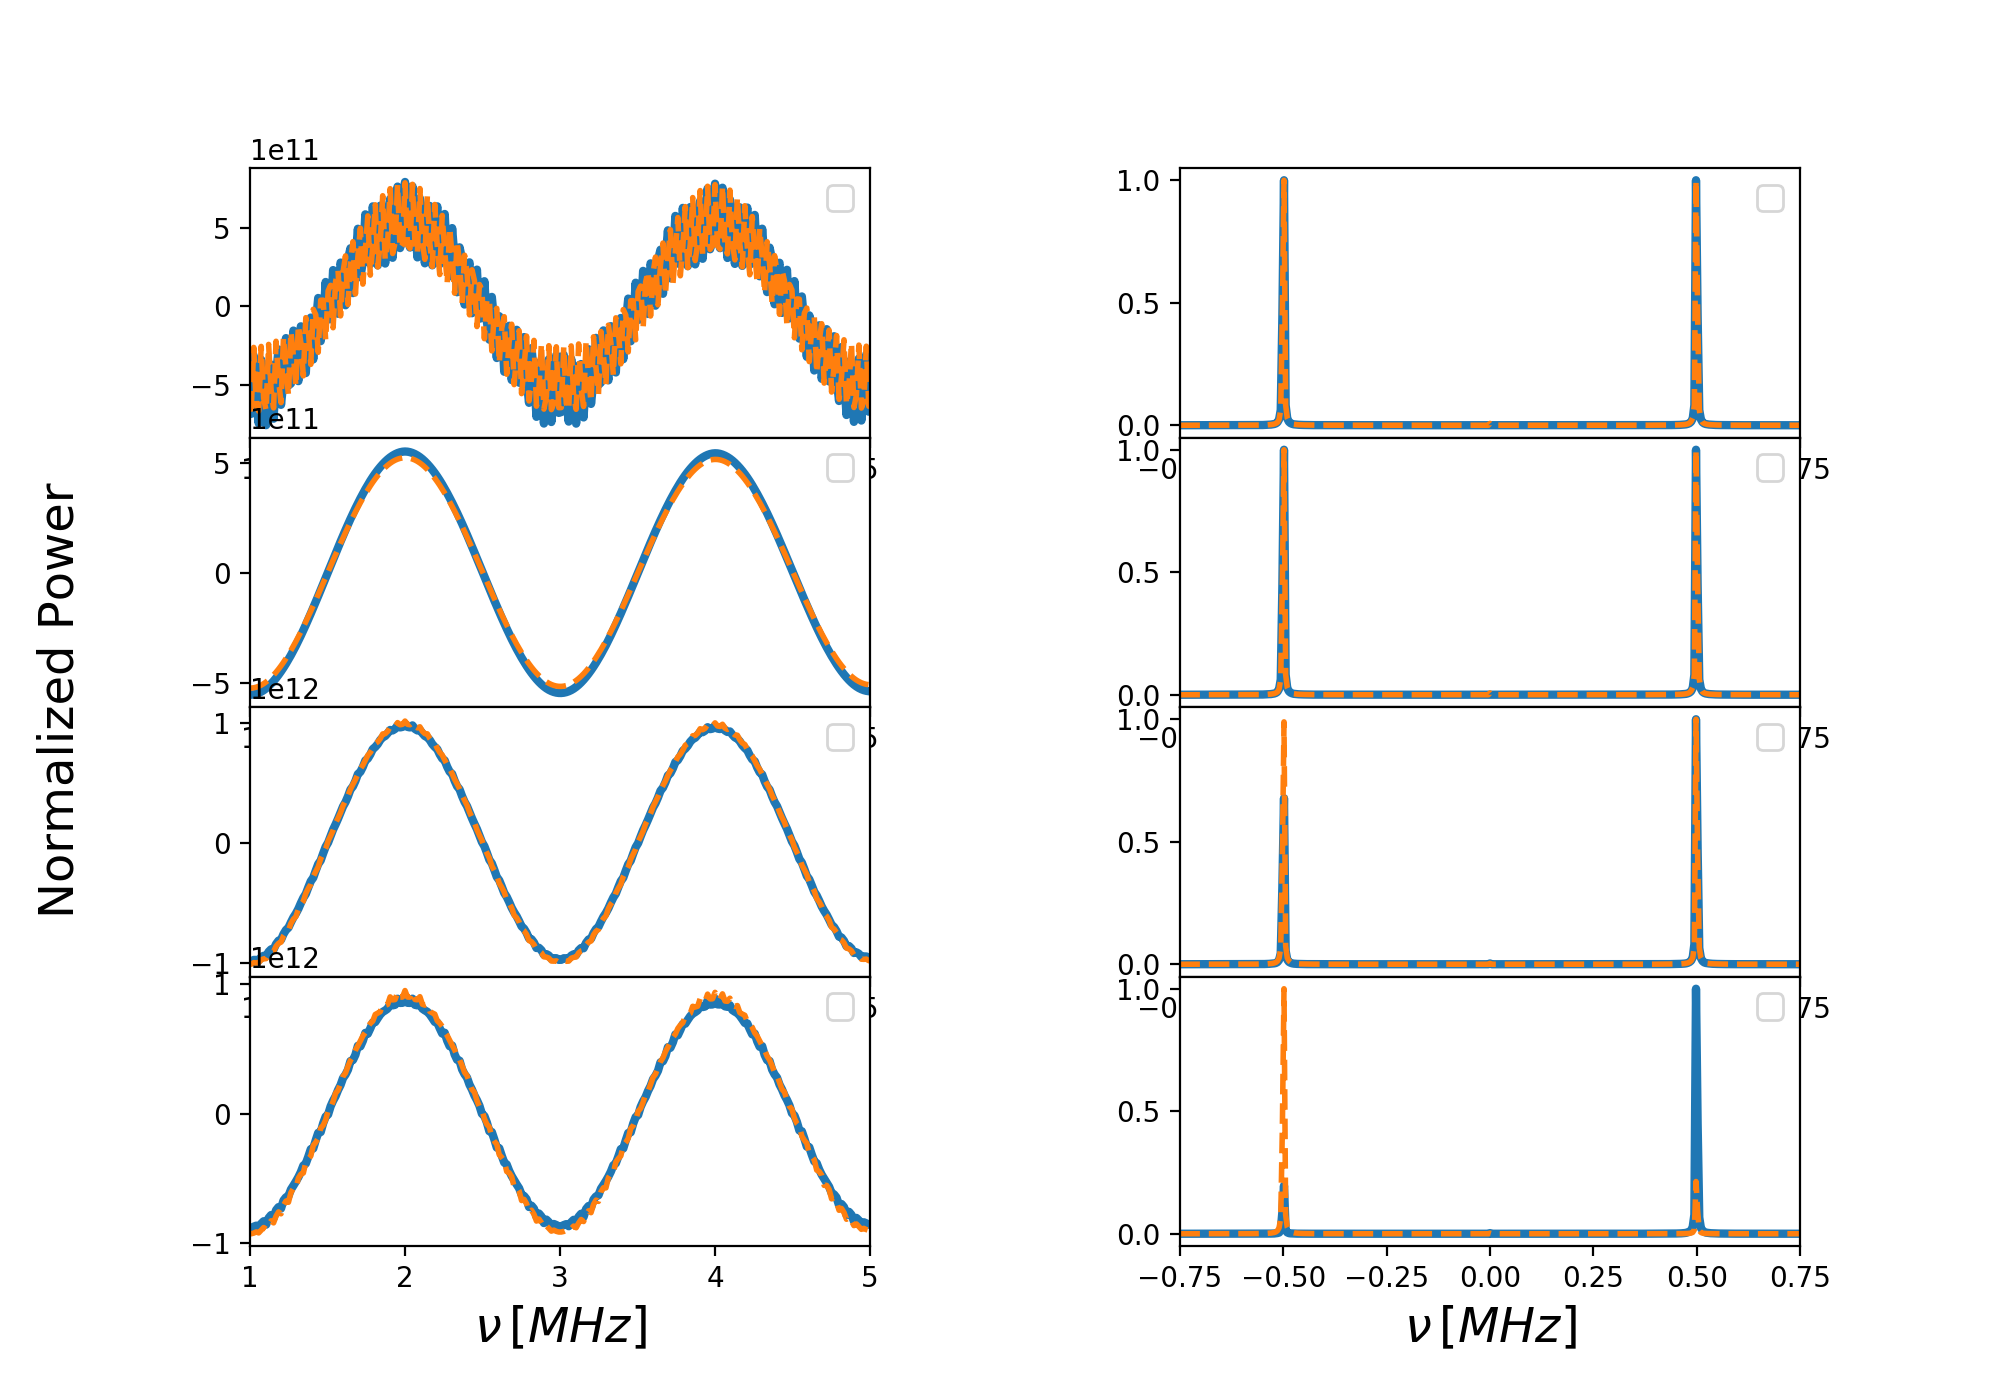

/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-209-2246a6ae9842>:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [209]:
fig, axs = plt.subplots(nrows=4,ncols=2, gridspec_kw={'hspace':0, 'wspace':.5}, figsize=(10,7))

axs[0,0].plot(times*1e6, np.fft.ifft(dsb_power[0]),  lw=3)
axs[0,0].plot(times*1e6,np.fft.ifft(dsb_power[1]),  ls='--', lw=2)
axs[0,0].legend(fontsize='12')
# axs[0,0].tick_params(axis='both', which='major', labelsize=12)
# axs[0,0].tick_params(axis='both', which='major', labelsize=12)
# axs[0,0].annotate('DSB', (-.05,.7), fontsize='x-large')
axs[0,0].set_xlim(1,5)


axs[1,0].plot(times*1e6, np.fft.ifft(filtered_power[0]),  lw=3)
axs[1,0].plot(times*1e6,np.fft.ifft(filtered_power[1]),  ls='--', lw=2)
axs[1,0].legend(fontsize='12')
# axs[1,0].tick_params(axis='both', which='major', labelsize=12)
# axs[1,0].tick_params(axis='both', which='major', labelsize=12)
# axs[1,0].annotate('Filtered DSB', (-.12,.7), fontsize='x-large')
axs[1,0].set_xlim(1,5)



# axs[1].set_xlim(-.75,.75)


axs[2,0].plot(times*1e6,np.fft.ifft(ssb_power[0]),  lw=3)
axs[2,0].plot(times*1e6,np.fft.ifft(ssb_power[1]),  ls='--', lw=2)
axs[2,0].legend(fontsize='12')
# axs[2,0].tick_params(axis='both', which='major', labelsize=12)
# axs[2,0].tick_params(axis='both', which='major', labelsize=12)
# axs[2,0].annotate('SSB No Phase Shift', (-.2,.7), fontsize='x-large')
axs[2,0].set_xlim(1,5)



# axs[2].set_xlim(-.75,.75)


axs[3,0].plot(times*1e6,np.fft.ifft(ssb_90_power[0]),  lw=3)
axs[3,0].plot(times*1e6,np.fft.ifft(ssb_90_power[1]),  ls='--', lw=2)
axs[3,0].legend(fontsize='12')
# axs[3,0].tick_params(axis='both', which='major', labelsize=12)
# axs[3,0].tick_params(axis='both', which='major', labelsize=12)
axs[3,0].set_xlabel(r'$\nu\, [MHz]$', fontsize='xx-large')
# axs[3,0].annotate('SSB', (-.05,.7), fontsize='x-large')
axs[3,0].set_xlim(1,5)



# plt.setp(axs[0].get_yticklabels()[0], visible=False)    
# plt.setp(axs[1].get_yticklabels()[-2], visible=False)    
# plt.setp(axs[1].get_yticklabels()[0], visible=False)  
# plt.setp(axs[2].get_yticklabels()[-2], visible=False)    

# fig, axs = plt.subplots(nrows=4, sharex=True, gridspec_kw={'hspace':.1}, figsize=(10,7))

axs[0,1].plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(dsb_power[0]/dsb_power[0].max()),  lw=3)
axs[0,1].plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(dsb_power[1]/dsb_power[1].max()),  ls='--', lw=2)
axs[0,1].legend(fontsize='12')
# axs[0,1].tick_params(axis='both', which='major', labelsize=12)
# axs[0,1].tick_params(axis='both', which='major', labelsize=12)
# axs[0,1].annotate('DSB', (-.05,.7), fontsize='x-large')
axs[0,1].set_xlim(-.75,.75)


axs[1,1].plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(filtered_power[0]/filtered_power[0].max()),  lw=3)
axs[1,1].plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(filtered_power[1]/filtered_power[1].max()),  ls='--', lw=2)
axs[1,1].legend(fontsize='12')
# axs[1,1].tick_params(axis='both', which='major', labelsize=12)
# axs[1,1].tick_params(axis='both', which='major', labelsize=12)
# axs[1,1].annotate('Filtered DSB', (-.12,.7), fontsize='x-large')


axs[1,1].set_xlim(-.75,.75)


axs[2,1].plot(np.fft.fftshift(freqs/1e6),np.fft.fftshift(ssb_power[0]/ssb_power[0].max()),  lw=3)
axs[2,1].plot(np.fft.fftshift(freqs/1e6),np.fft.fftshift(ssb_power[1]/ssb_power[1].max()),  ls='--', lw=2)
axs[2,1].legend(fontsize='12')
# axs[2,1].tick_params(axis='both', which='major', labelsize=12)
# axs[2,1].tick_params(axis='both', which='major', labelsize=12)
# axs[2,1].annotate('SSB No Phase Shift', (-.2,.7), fontsize='x-large')


axs[2,1].set_xlim(-.75,.75)


axs[3,1].plot(np.fft.fftshift(freqs/1e6),np.fft.fftshift(ssb_90_power[0]/ssb_90_power[0].max()),  lw=3)
axs[3,1].plot(np.fft.fftshift(freqs/1e6),np.fft.fftshift(ssb_90_power[1]/ssb_90_power[1].max()),  ls='--', lw=2)
axs[3,1].legend(fontsize='12')
# axs[3,1].tick_params(axis='both', which='major', labelsize=12)
# axs[3,1].tick_params(axis='both', which='major', labelsize=12)
axs[3,1].set_xlabel(r'$\nu\, [MHz]$', fontsize='xx-large')
# axs[3,1].annotate('SSB', (-.05,.7), fontsize='x-large')
axs[3,1].set_xlim(-.75,.75)



# plt.setp(axs[0].get_yticklabels()[0], visible=False)    
# plt.setp(axs[1].get_yticklabels()[-2], visible=False)    
# plt.setp(axs[1].get_yticklabels()[0], visible=False)  
# plt.setp(axs[2].get_yticklabels()[-2], visible=False)    






fig.text(0.03, 0.5, 'Normalized Power', ha='center', va='center', rotation='vertical', fontsize='xx-large')
plt.tight_layout()
plt.savefig('Mixers.pdf')

In [216]:
acf_dsb = [np.fft.ifft(dat) for dat in dsb_power]
acf_dsb_filtered = [np.fft.ifft(dat) for dat in filtered_power]
acf_ssb = [np.fft.ifft(dat) for dat in ssb_power]
acf_90_ssb = [np.fft.ifft(dat) for dat in ssb_90_power]

<IPython.core.display.Javascript object>


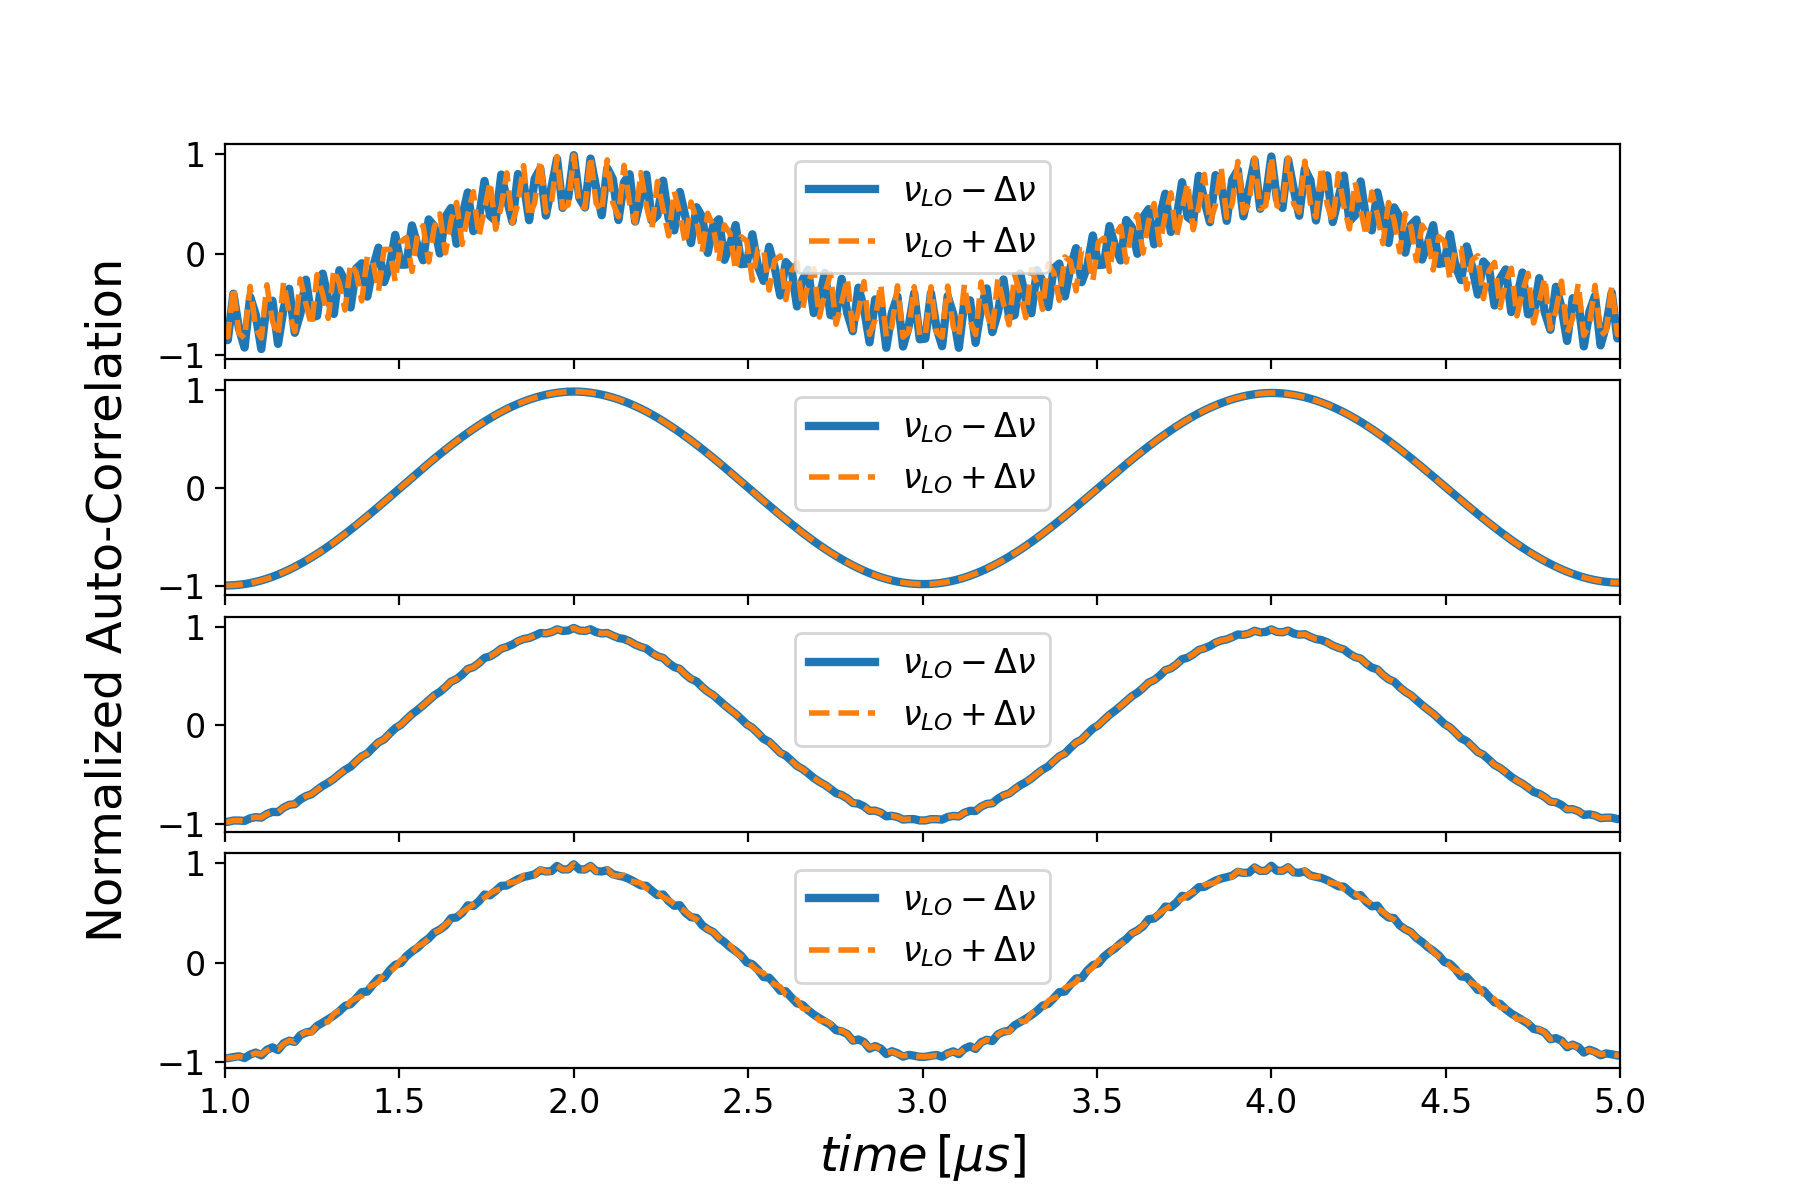

Text(0.06, 0.5, 'Normalized Auto-Correlation')

In [240]:
fig, axs = plt.subplots(nrows=4, gridspec_kw={'hspace':.1}, figsize=(9,6))

axs[0].plot(times*1e6, acf_dsb[0]/acf_dsb[0].max(),  lw=3, label=r'$\nu_{LO}-\Delta\nu$')
axs[0].plot(times*1e6,acf_dsb[1]/acf_dsb[1].max(),  ls='--', lw=2, label=r'$\nu_{LO}+\Delta\nu$')
axs[0].legend(fontsize='12')
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].annotate('DSB', (-.05,.7), fontsize='x-large')
axs[0].set_xlim(1,5)


axs[1].plot(times*1e6, acf_dsb_filtered[0]/acf_dsb_filtered[0].max(),  lw=3, label=r'$\nu_{LO}-\Delta\nu$')
axs[1].plot(times*1e6,acf_dsb_filtered[0]/acf_dsb_filtered[0].max(),  ls='--', lw=2, label=r'$\nu_{LO}+\Delta\nu$')
axs[1].legend(fontsize='12')
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].annotate('Filtered DSB', (-.12,.7), fontsize='x-large')
axs[1].set_xlim(1,5)



# axs[1].set_xlim(-.75,.75)


axs[2].plot(times*1e6,acf_ssb[0]/acf_ssb[0].max(),  lw=3, label=r'$\nu_{LO}-\Delta\nu$')
axs[2].plot(times*1e6,acf_ssb[0]/acf_ssb[0].max(),  ls='--', lw=2, label=r'$\nu_{LO}+\Delta\nu$')
axs[2].legend(fontsize='12')
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].annotate('SSB No Phase Shift', (-.2,.7), fontsize='x-large')
axs[2].set_xlim(1,5)



# axs[2].set_xlim(-.75,.75)


axs[3].plot(times*1e6,acf_90_ssb[0]/acf_90_ssb[0].max(),  lw=3, label=r'$\nu_{LO}-\Delta\nu$')
axs[3].plot(times*1e6,acf_90_ssb[1]/acf_90_ssb[1].max(),  ls='--', lw=2, label=r'$\nu_{LO}+\Delta\nu$')
axs[3].legend(fontsize='12')
axs[3].tick_params(axis='both', which='major', labelsize=12)
axs[3].tick_params(axis='both', which='major', labelsize=12)
axs[3].set_xlabel(r'$time\, [\mu s]$', fontsize='xx-large')
axs[3].annotate('SSB', (-.05,.7), fontsize='x-large')
axs[3].set_xlim(1,5)

plt.setp(axs[0].get_xticklabels()[0], visible=False) 
plt.setp(axs[1].get_xticklabels()[0], visible=False) 
plt.setp(axs[2].get_xticklabels()[0], visible=False)
plt.setp(axs[0].get_xticklabels()[-1], visible=False) 
plt.setp(axs[1].get_xticklabels()[-1], visible=False) 
plt.setp(axs[2].get_xticklabels()[-1], visible=False) 

fig.text(0.06, 0.5, 'Normalized Auto-Correlation', ha='center', va='center', rotation='vertical', fontsize='xx-large')
# lines_labels = 
# lines, labels = [sum(lol, []) for lol in lines_labels]

# finally we invoke the legend (that you probably would like to customize...)
plt.



In [561]:
files

['/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB90/10MHz_lower_sb_ssb_phase_shift.npz',
 '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB90/10MHz_upper_sb_ssb_phase_shift.npz']

In [80]:
v_rf  = np.array([16.40625,
14.84375])

In [81]:
(freqs[258]- freqs[250])/1e6

1.66111111111111

In [511]:
delta_nu/1e6*2

1.5375

array([ 0.        ,  0.316386  ,  0.44743737,  0.54799662,  0.632772  ,
        0.7074606 ,  0.77498426,  0.83707867,  0.89487474,  0.949158  ,
        1.00050038,  1.04933365,  1.09599325,  1.14074594,  1.18380801,
        1.2253577 ,  1.26554399,  1.30449289,  1.34231211,  1.37909459,
        1.4149212 ,  1.44986279,  1.48398187,  1.51733395,  1.54996852,
        1.58192999,  1.61325838,  1.64398987,  1.67415734,  1.70379075,
        1.73291748,  1.76156269,  1.78974948,  1.81749919,  1.84483154,
        1.87176481,  1.89831599,  1.9245009 ,  1.95033428,  1.97582993,
        2.00100075,  2.02585886,  2.05041562,  2.07468174,  2.09866729,
        2.1223818 ,  2.14583424,  2.16903313,  2.1919865 ,  2.21470199,
        2.23718685,  2.25944796,  2.28149188,  2.30332484,  2.32495277,
        2.34638136,  2.36761602,  2.38866191,  2.40952398,  2.43020697,
        2.45071541,  2.47105364,  2.49122584,  2.51123601,  2.53108799,
        2.55078547,  2.570332  ,  2.58973101,  2.60898578,  2.62

<IPython.core.display.Javascript object>


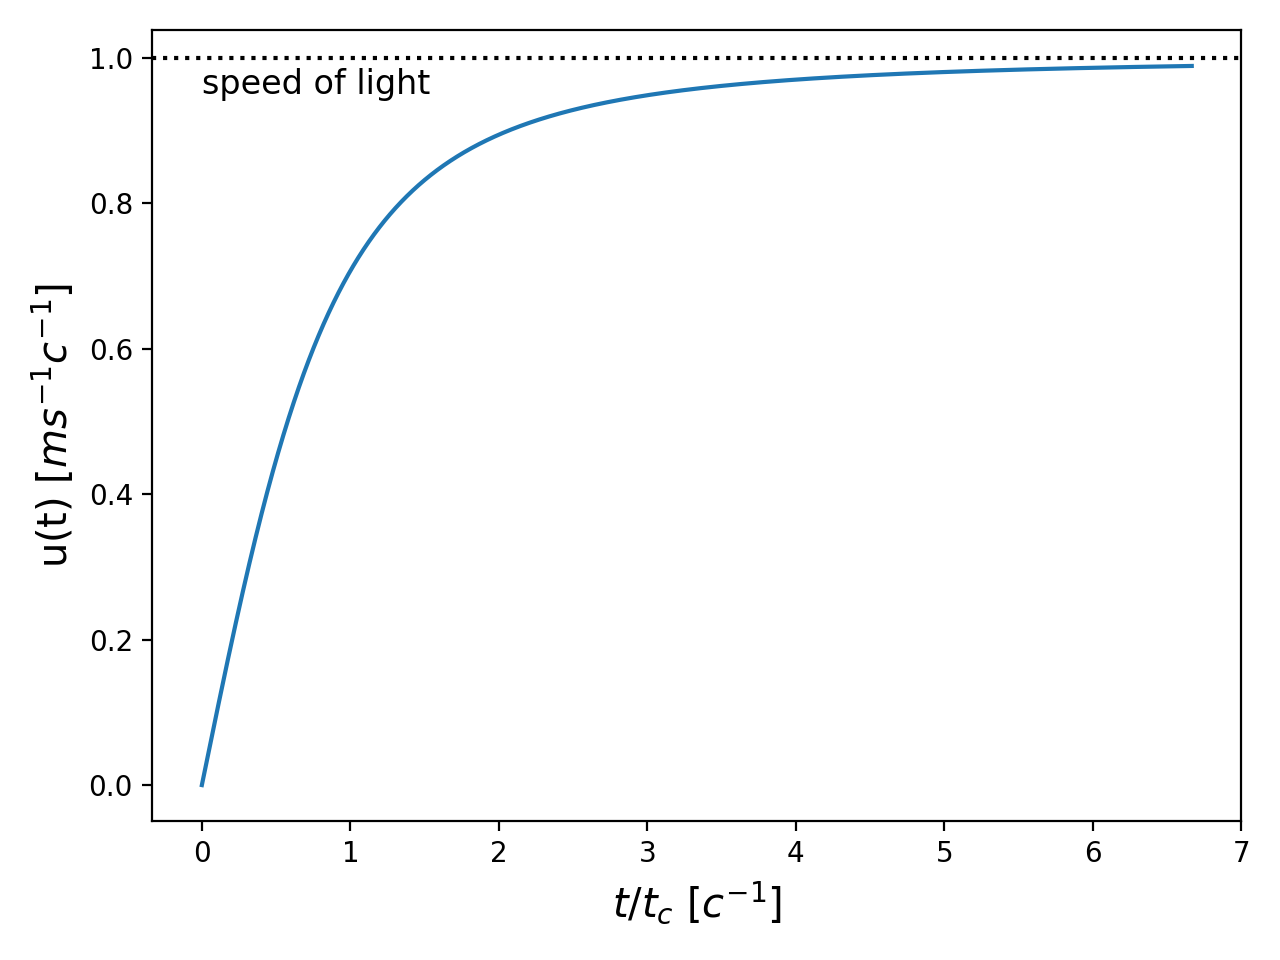

In [118]:
plt.figure()
t = np.linspace(.1,2000000000,3000)
y = np.sqrt(1/(3e8**2/t**2+1))

plt.plot(t/3e8, y)
plt.ylabel(r'u(t) [$ms^{-1}c^{-1}$]', fontsize='x-large')
plt.xlabel(r'$t/t_c$ [$c^{-1}$]', fontsize='x-large')
plt.axhline(1, color='k', ls=':')
plt.annotate('speed of light', (0,.95), fontsize='large')
plt.tight_layout()
plt.savefig('c161.pdf')

In [364]:
def noise(N):
    return np.random.normal(0,1,N)


In [486]:
times = np.linspace(0,1,1000)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))
n = np.concatenate((np.zeros(1000), np.concatenate((noise(len(times))*2+np.sin(4*times*np.pi), np.zeros(1000)))))
times = np.linspace(0,1,1000)

y = np.concatenate(( np.sin(4*times*np.pi),np.zeros(2000)))

In [491]:
new_times = np.linspace(0,4,3000)

<IPython.core.display.Javascript object>


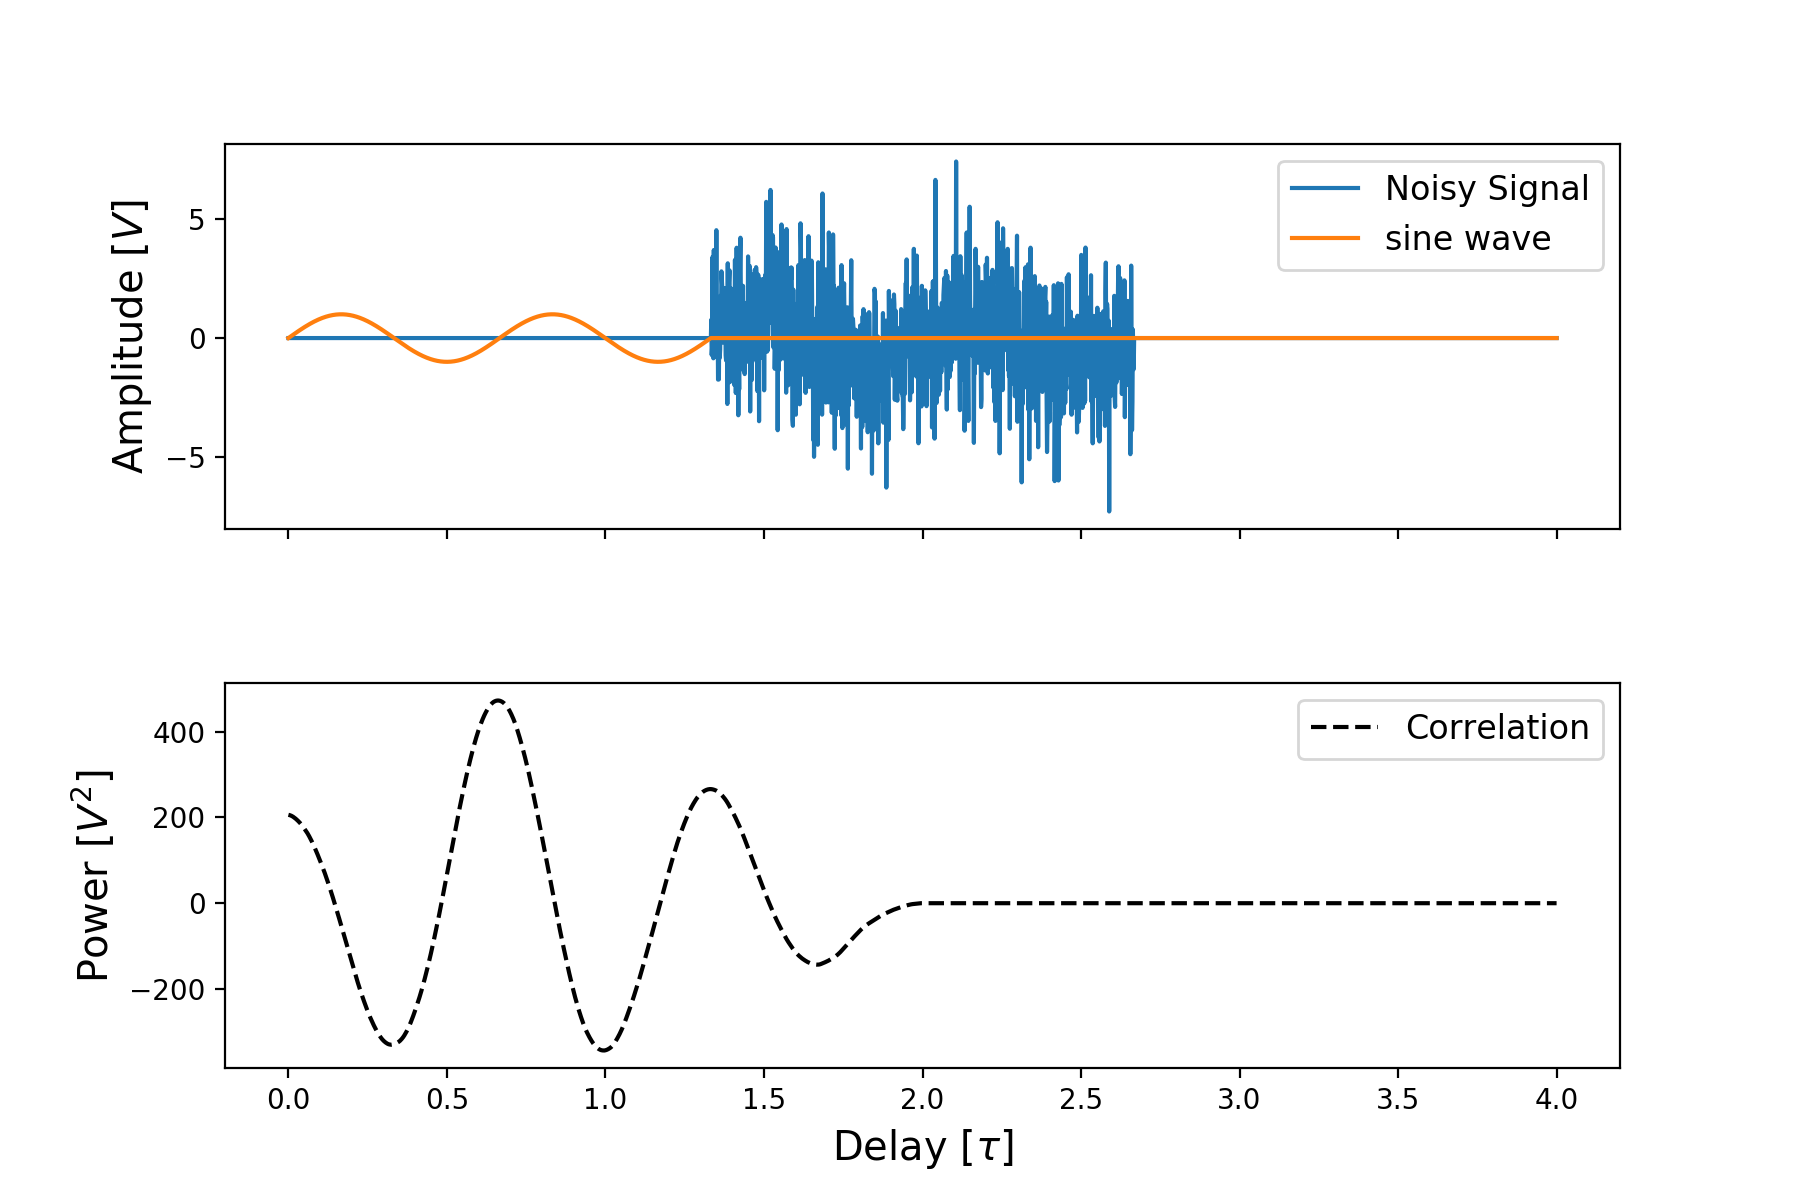

<ipython-input-494-08e24bd19c18>:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [494]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':.4}, figsize=(9,6))
ax1.plot(new_times, n, label='Noisy Signal')
ax1.plot(new_times,y, label='sine wave')
ax2.set_xlabel(r'Delay [$\tau$]', fontsize='x-large')
ax1.set_ylabel(r'Amplitude [$V$]', fontsize='x-large')
ax1.legend(fontsize='12')
ax2.plot(new_times, np.real(np.correlate(y,n, mode='same')),'--k', label='Correlation')


ax2.set_ylabel(r'Power [$V^2$]', fontsize='x-large')
ax2.legend(fontsize='12')
plt.tight_layout()

In [261]:
plt.figure()
plt.subplot(121)
plt.semilogy(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(np.fft.fft(n))**2))
plt.subplot(122)
plt.semilogy(np.fft.fftshift(freqs),np.fft.fftshift(np.abs(np.fft.fft(np.correlate(n,y,mode='same')))**2))

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (1000,) and (3000,)